# **Loan Default Prediction**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?

### **The objective:**

 - What is the intended goal?

### **The key questions:**

- What are the key questions that need to be answered?

### **The problem formulation**:

- What is it that we are trying to solve using data science?

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property.

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts)

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments).

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due).

* **CLAGE:** Age of the oldest credit line in months.

* **NINQ:** Number of recent credit inquiries.

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Import the necessary libraries and Data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/MIT_ADSP/Capstone Projects/Capstone Project - Practical Data Science /hmeq.csv")

In [4]:
#Check first 5 lines to make sure that corrrect data file is loaded
df.head()

BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN  
2  149.466667   1.0  10.0      NaN  
3         NaN   NaN   NaN      NaN  
4   93.333333   0.0  14.0      NaN

In [5]:
# Displaying last 5 rows
df.tail()

BAD   LOAN  MORTDUE    VALUE   REASON    JOB   YOJ  DEROG  DELINQ  \
5955    0  88900  57264.0  90185.0  DebtCon  Other  16.0    0.0     0.0   
5956    0  89000  54576.0  92937.0  DebtCon  Other  16.0    0.0     0.0   
5957    0  89200  54045.0  92924.0  DebtCon  Other  15.0    0.0     0.0   
5958    0  89800  50370.0  91861.0  DebtCon  Other  14.0    0.0     0.0   
5959    0  89900  48811.0  88934.0  DebtCon  Other  15.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC  
5955  221.808718   0.0  16.0  36.112347  
5956  208.692070   0.0  15.0  35.859971  
5957  212.279697   0.0  15.0  35.556590  
5958  213.892709   0.0  16.0  34.340882  
5959  219.601002   0.0  16.0  34.571519

In [6]:
# Checking the shape of the data
df.shape

(5960, 13)

In [7]:
# Checking info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [8]:
#check for dupplicate valies
df.duplicated().value_counts()

False    5960
Name: count, dtype: int64

In [9]:
(df.duplicated().value_counts()/df.shape[0] * 100)

False    100.0
Name: count, dtype: float64

In [10]:
# Checking for missing values
(df.isnull().sum())

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [11]:
# Checking the percentage of missing values in the each column.
(df.isnull().sum()/df.shape[0] * 100)

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64

In [12]:
# copying data to another variable to avoid any changes to original data
data = df.copy()

####Obserations:

* Original number of Columns = 13     
* 5960 rows     
* There are two int64 and nine float64 and two object datatype columns        
* There are 11 rows with missing values

---



## Summary Statistics

In [13]:
num_count = data.nunique()
print(num_count)

BAD           2
LOAN        540
MORTDUE    5053
VALUE      5381
REASON        2
JOB           6
YOJ          99
DEROG        11
DELINQ       14
CLAGE      5314
NINQ         16
CLNO         62
DEBTINC    4693
dtype: int64


In [14]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())


REASON
DebtCon    3928
HomeImp    1780
Name: count, dtype: int64
JOB
Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: count, dtype: int64


In [15]:
cols = data.select_dtypes(['object']).columns.tolist()
#adding target variable to this list as this is a classification problem and the target variable is categorical

cols.append('BAD')

cols

['REASON', 'JOB', 'BAD']

In [16]:
# Getting the first rows in dataset with unique JOB values without dropping any values, including NaN (no job mention in dataset for the applicant)
unique_job_types = data.drop_duplicates(subset='JOB', keep='first')
print(unique_job_types)

    BAD  LOAN  MORTDUE     VALUE   REASON      JOB   YOJ  DEROG  DELINQ  \
0     1  1100  25860.0   39025.0  HomeImp    Other  10.5    0.0     0.0   
3     1  1500      NaN       NaN      NaN      NaN   NaN    NaN     NaN   
4     0  1700  97800.0  112000.0  HomeImp   Office   3.0    0.0     0.0   
9     1  2000      NaN   62250.0  HomeImp    Sales  16.0    0.0     0.0   
13    0  2000  64536.0   87400.0      NaN      Mgr   2.5    0.0     0.0   
21    1  2400  50000.0   73395.0  HomeImp  ProfExe   5.0    1.0     0.0   
29    0  2500   7229.0   44516.0  HomeImp     Self   NaN    0.0     0.0   

         CLAGE  NINQ  CLNO  DEBTINC  
0    94.366667   1.0   9.0      NaN  
3          NaN   NaN   NaN      NaN  
4    93.333333   0.0  14.0      NaN  
9   115.800000   0.0  13.0      NaN  
13  147.133333   0.0  24.0      NaN  
21         NaN   1.0   0.0      NaN  
29  208.000000   0.0  12.0      NaN  


In [17]:
cols = data.select_dtypes(['object']).columns.tolist()
#adding target variable to this list as this is a classification problem and the target variable is categorical

cols.append('BAD')

###### Converting the data columns to category to reduces the data space required to store the dataframe

In [18]:
data.info()

# Changing the data type of object type column to category.

for i in cols:
    data[i] = data[i].astype("category")


print("\n\n\n\033[1mAfter making the data type, we get:\033[0m \n")
# Checking the info again and the datatype of different variable

data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB



After making the data type, we get: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   cat

In [19]:
# Sumarizing numerical columns data
num_cols = data.describe().T.round(2)
num_cols


count       mean       std      min       25%       50%        75%  \
LOAN     5960.0   18607.97  11207.48  1100.00  11100.00  16300.00   23300.00   
MORTDUE  5442.0   73760.82  44457.61  2063.00  46276.00  65019.00   91488.00   
VALUE    5848.0  101776.05  57385.78  8000.00  66075.50  89235.50  119824.25   
YOJ      5445.0       8.92      7.57     0.00      3.00      7.00      13.00   
DEROG    5252.0       0.25      0.85     0.00      0.00      0.00       0.00   
DELINQ   5380.0       0.45      1.13     0.00      0.00      0.00       0.00   
CLAGE    5652.0     179.77     85.81     0.00    115.12    173.47     231.56   
NINQ     5450.0       1.19      1.73     0.00      0.00      1.00       2.00   
CLNO     5738.0      21.30     10.14     0.00     15.00     20.00      26.00   
DEBTINC  4693.0      33.78      8.60     0.52     29.14     34.82      39.00   

               max  
LOAN      89900.00  
MORTDUE  399550.00  
VALUE    855909.00  
YOJ          41.00  
DEROG        10.00  
DELINQ       15.00  
CLAGE      1168.23  
NINQ         17.00  
CLNO         71.00  
DEBTINC     203.31

##### Obeservations:
* Mean Loan amount is approximately 18.6K, with max being 89.9K
* Mean Mortgage due amount is approximately 73.76K, with max being 399.55K
* Mean VALUE for property is approximately 101.76K, with max being 855.91K
* Average Years at cirrent JOB is approx 9, with 50% applicant around 7 years and max 41 years.

In [20]:
num_cols_title = data.select_dtypes(include=['float64', 'int64']).columns
num_cols_title

Index(['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ',
       'CLNO', 'DEBTINC'],
      dtype='object')

In [21]:
# Sumarizing categorical columns data

data.describe(include=['category']).T

count unique      top  freq
BAD     5960      2        0  4771
REASON  5708      2  DebtCon  3928
JOB     5681      6    Other  2388

In [22]:
# Checking the count of unique values in each categorical column

cat_cols= data.select_dtypes(['category'])

for i in cat_cols.columns:
    print('\nUnique values in',i, 'are :')
    print(data[i].value_counts(normalize = True))
    print('*'*40)


Unique values in BAD are :
BAD
0    0.800503
1    0.199497
Name: proportion, dtype: float64
****************************************

Unique values in REASON are :
REASON
DebtCon    0.688157
HomeImp    0.311843
Name: proportion, dtype: float64
****************************************

Unique values in JOB are :
JOB
Other      0.420349
ProfExe    0.224608
Office     0.166872
Mgr        0.135011
Self       0.033973
Sales      0.019187
Name: proportion, dtype: float64
****************************************


##### **Observations:**
* BAD has two unique values.
  * 1 mean Client defaulted on loan
  * 0 mean loan repaid
* REASON has two unique values.
  * HomeImp = home improvement
  * DebtCon= debt consolidation
* JOB has six unique values.
  * ProfExe
  * Office
  * Mgr
  * Sales
  * Self
  * Other    



---



## **Exploratory Data Analysis (EDA) and Visualization**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [23]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)},
                                           figsize = figsize
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram


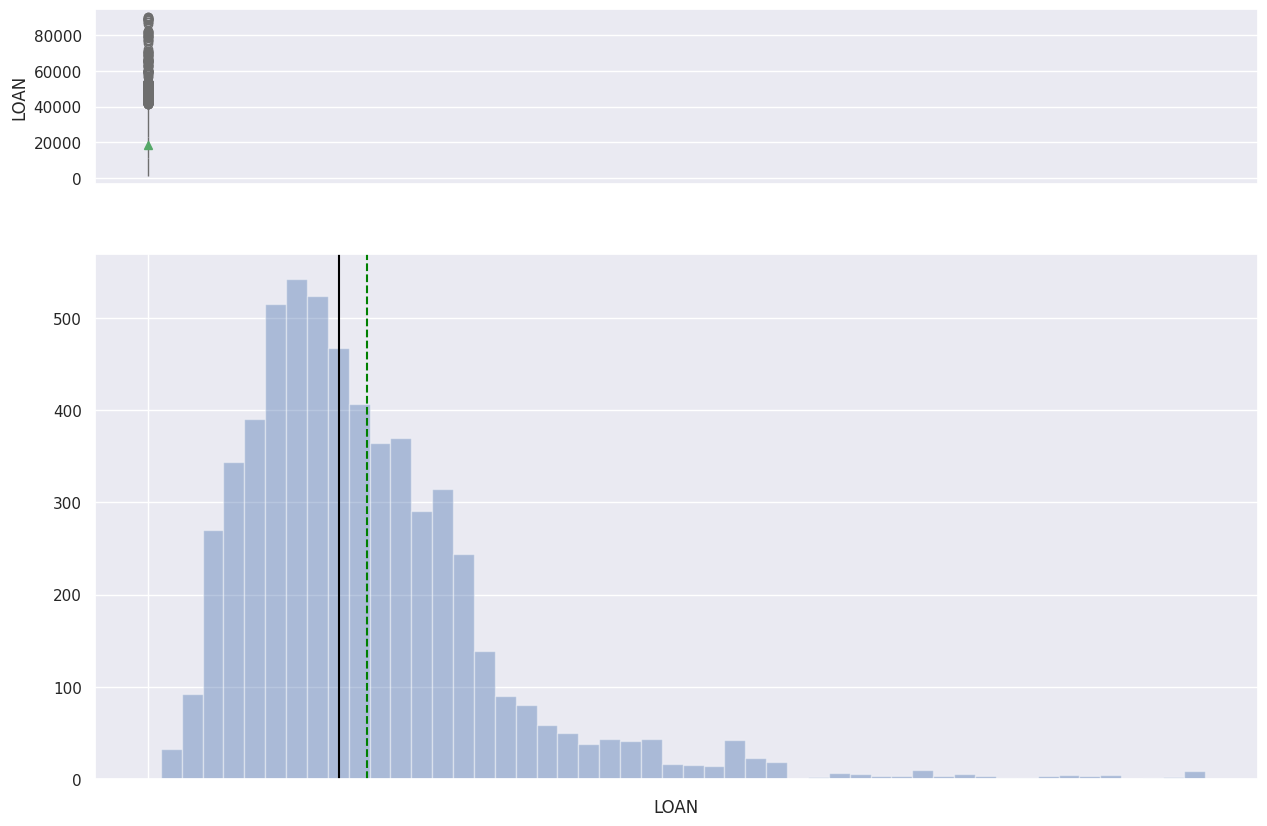

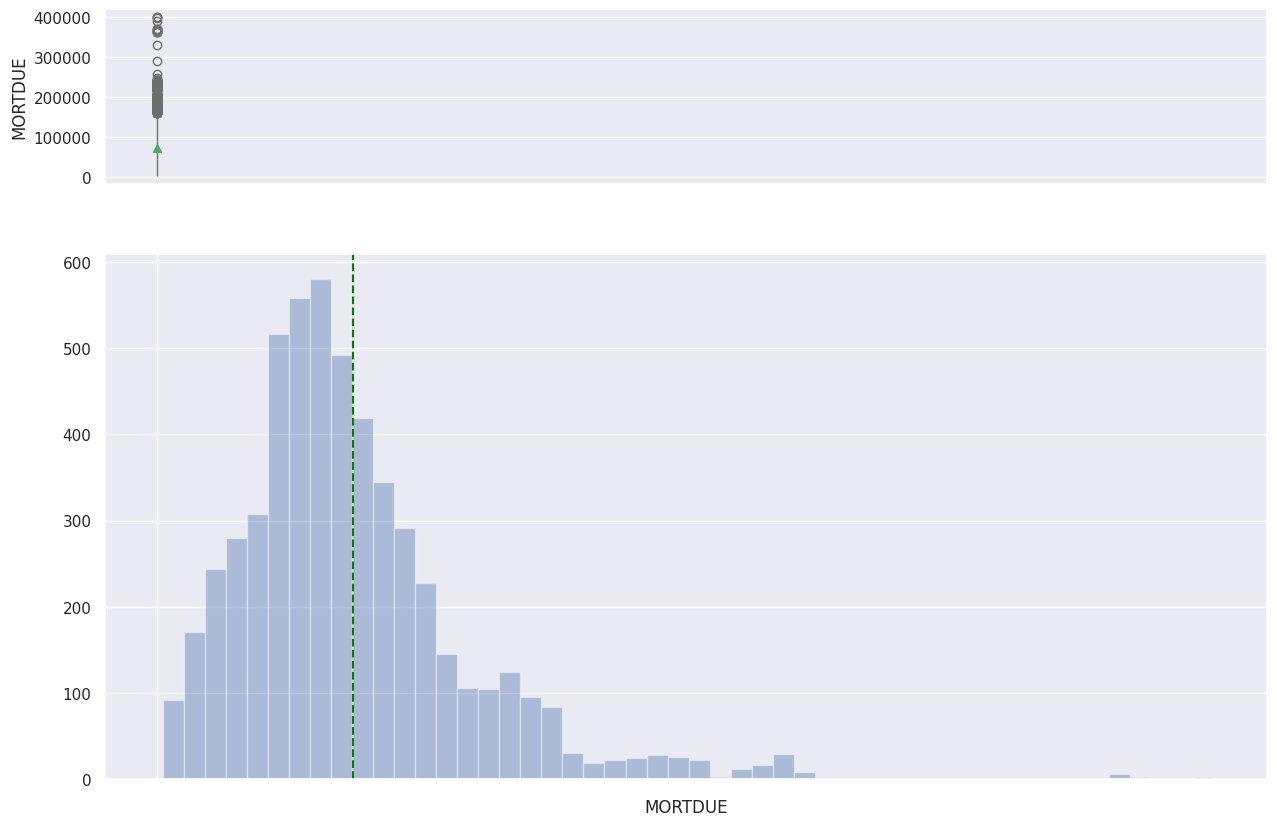

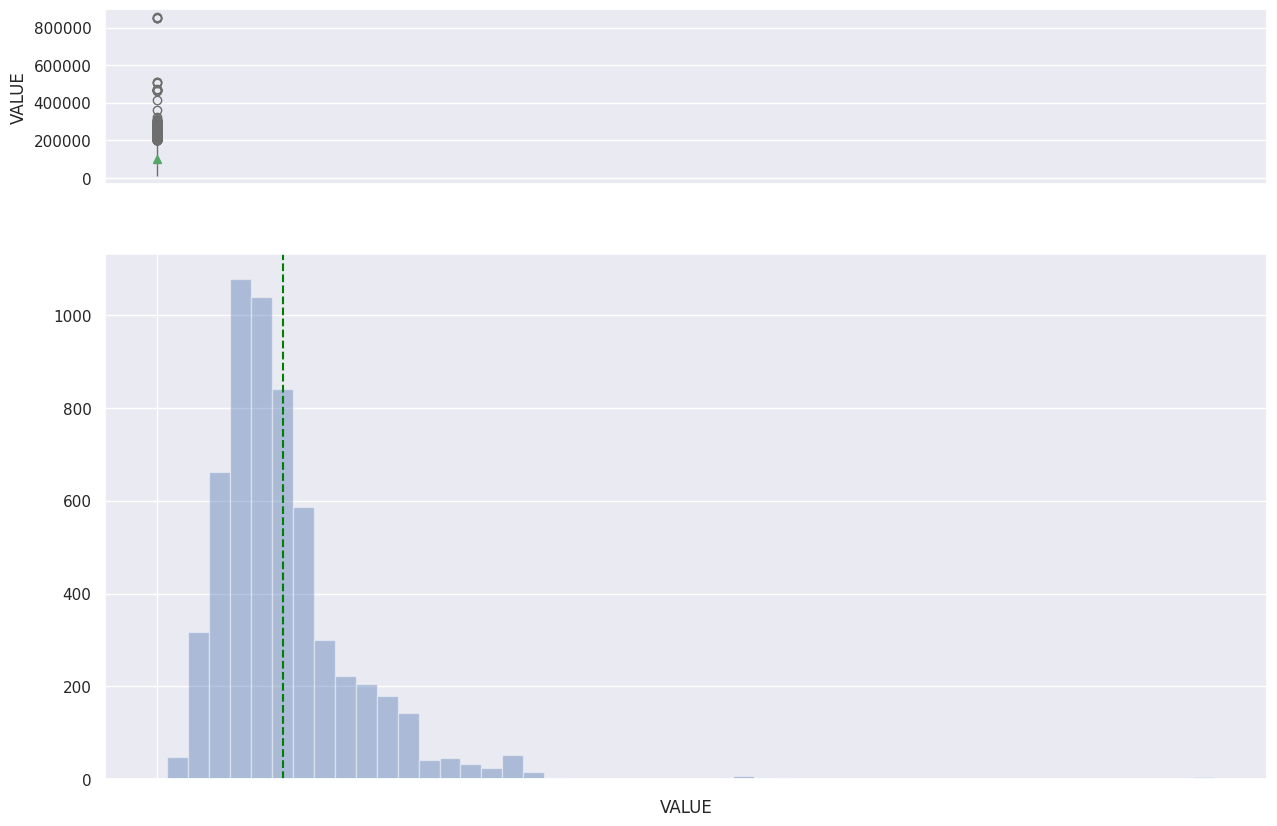

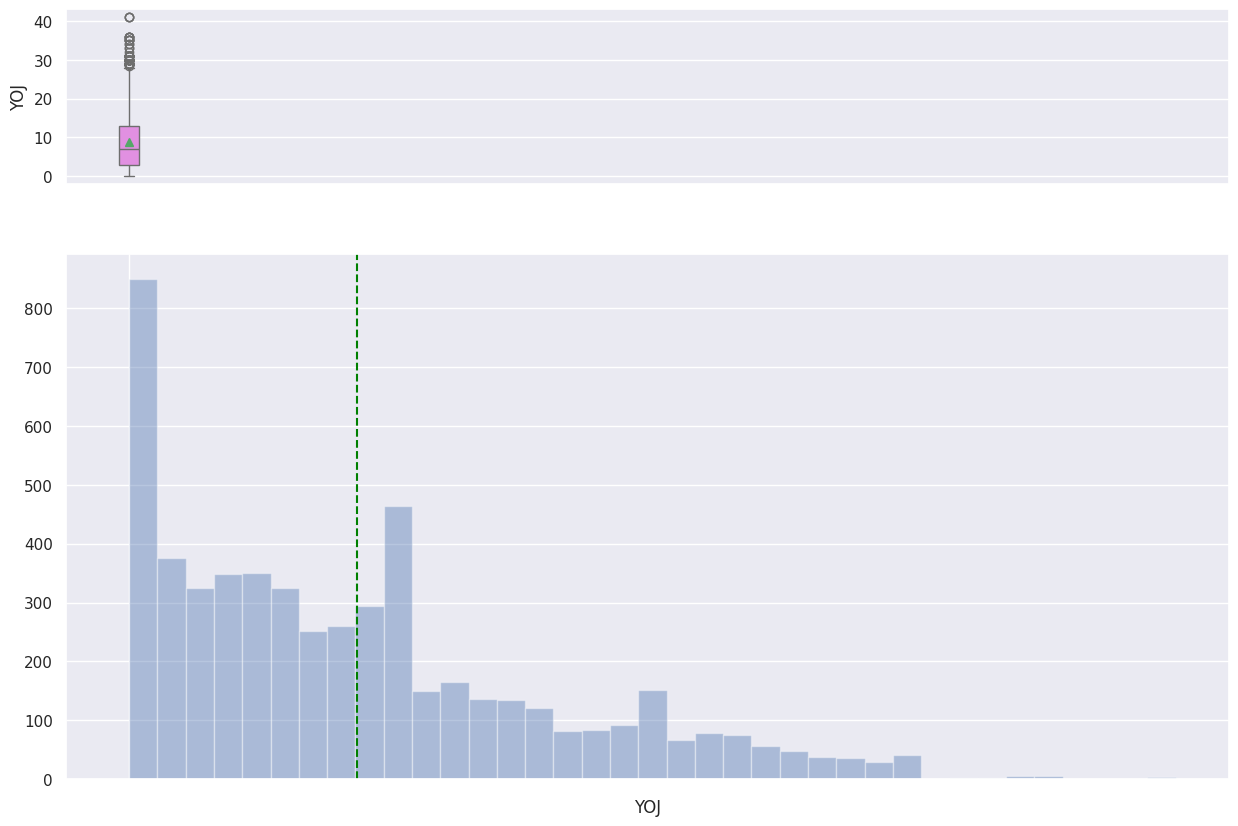

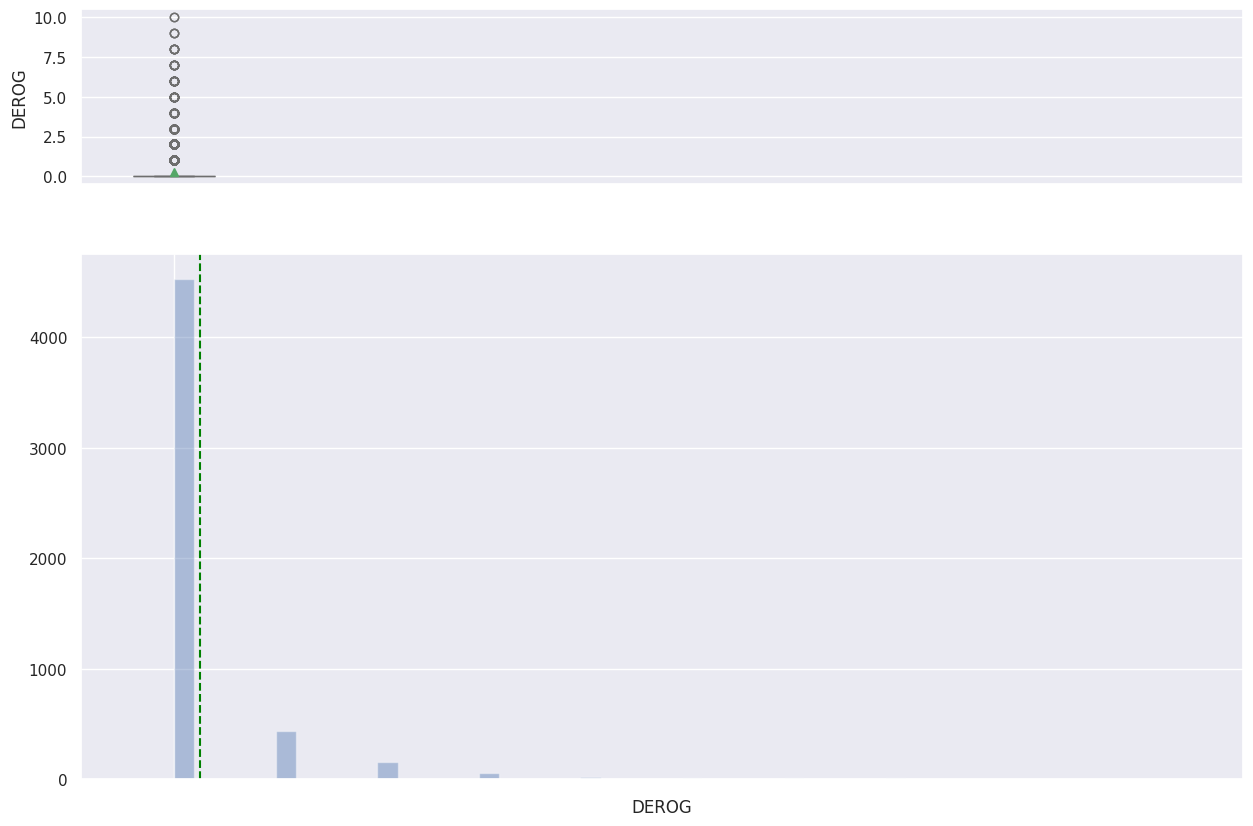

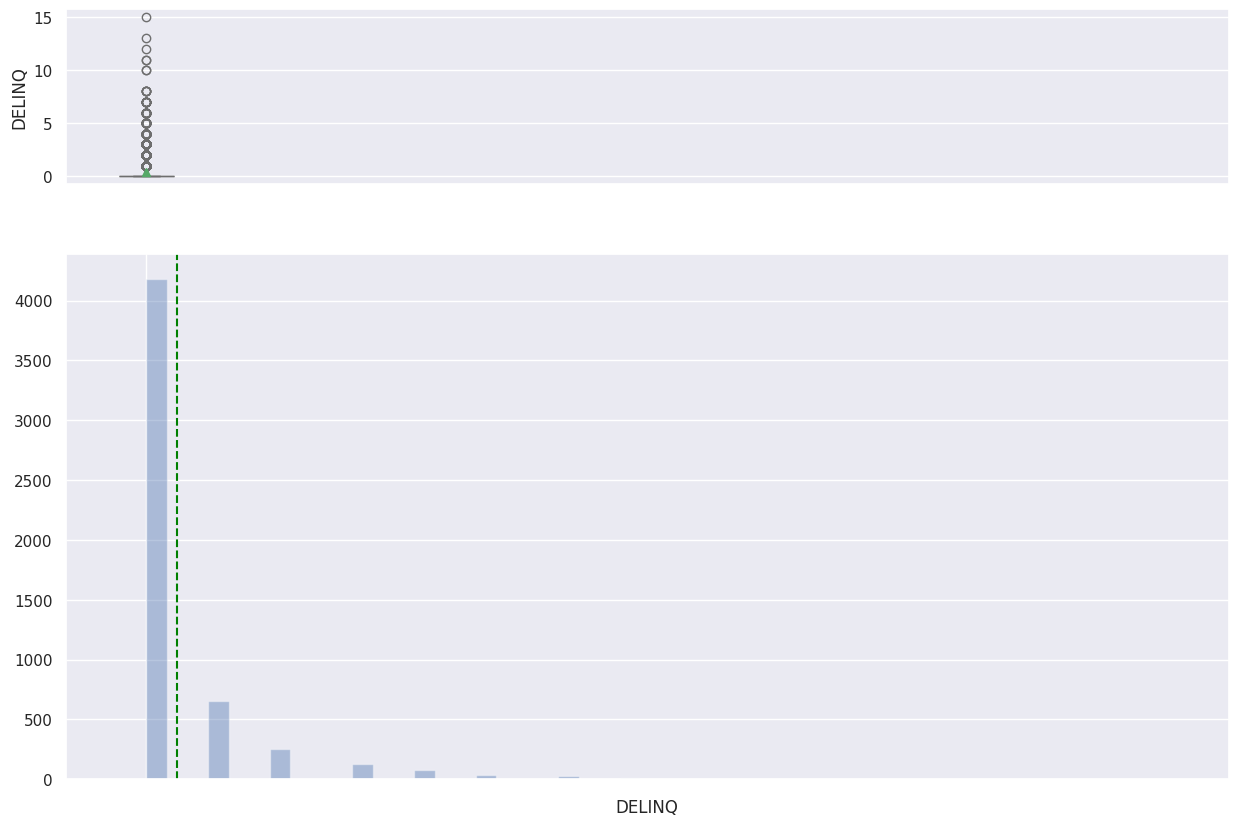

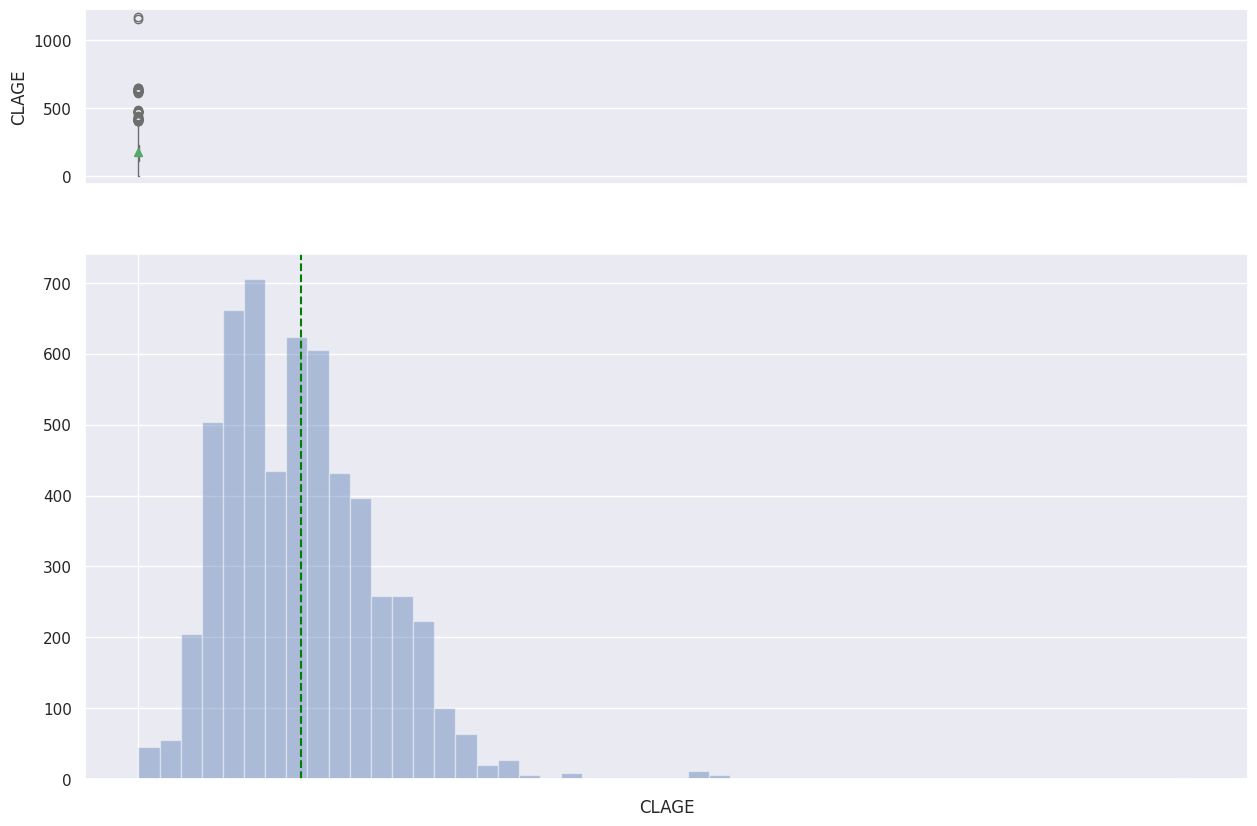

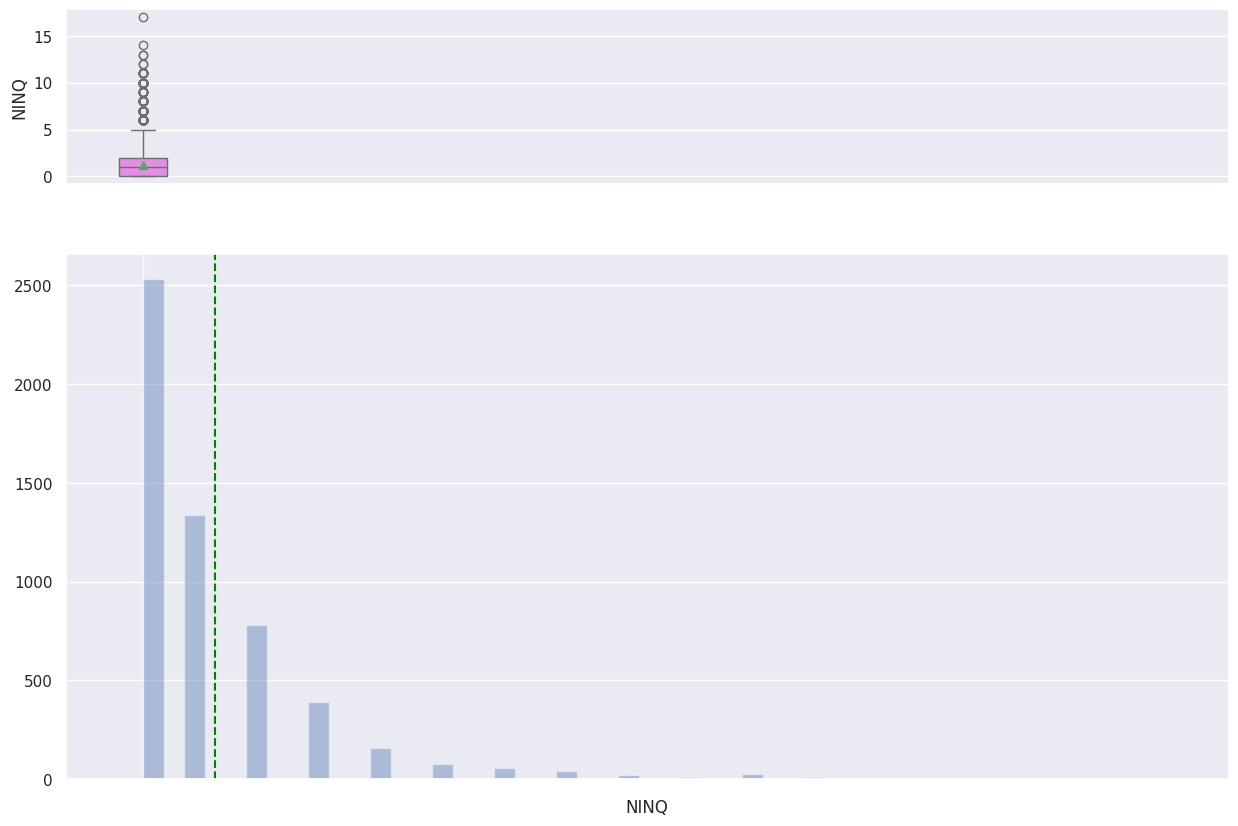

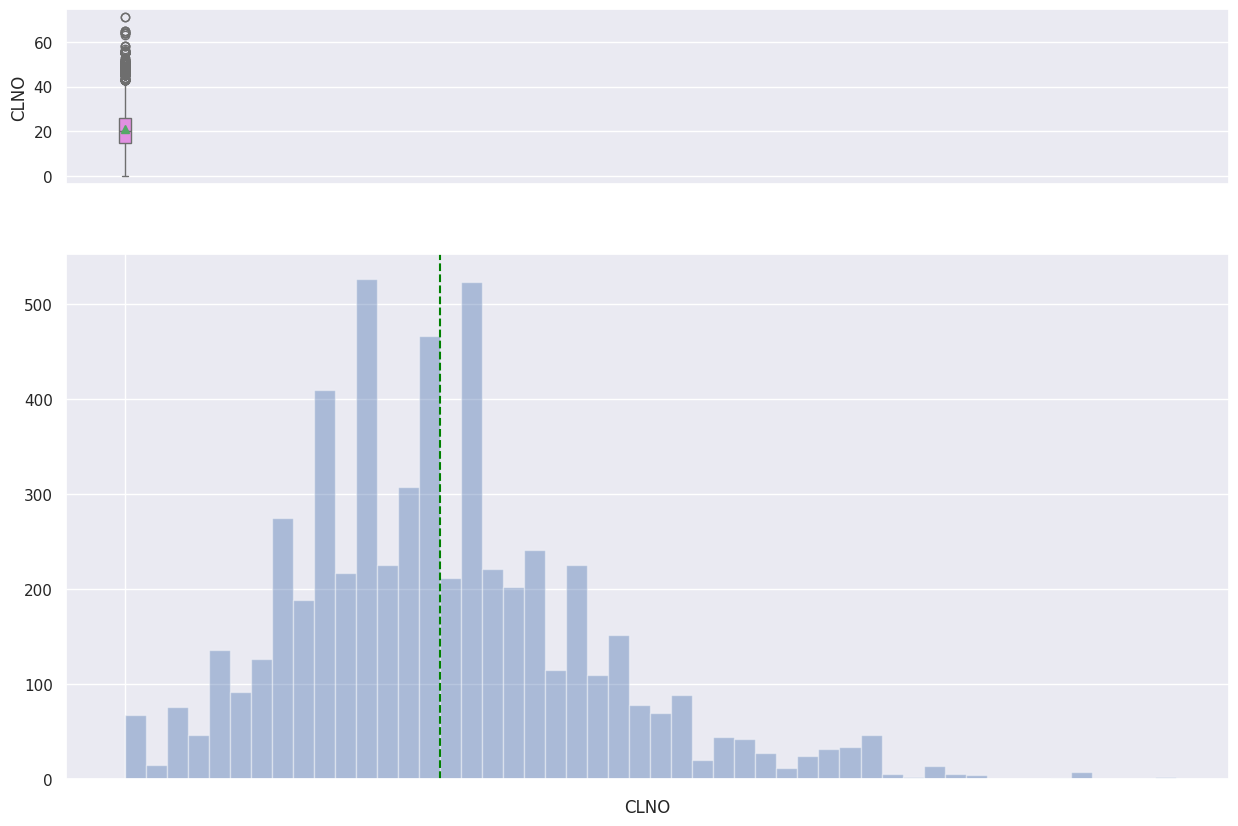

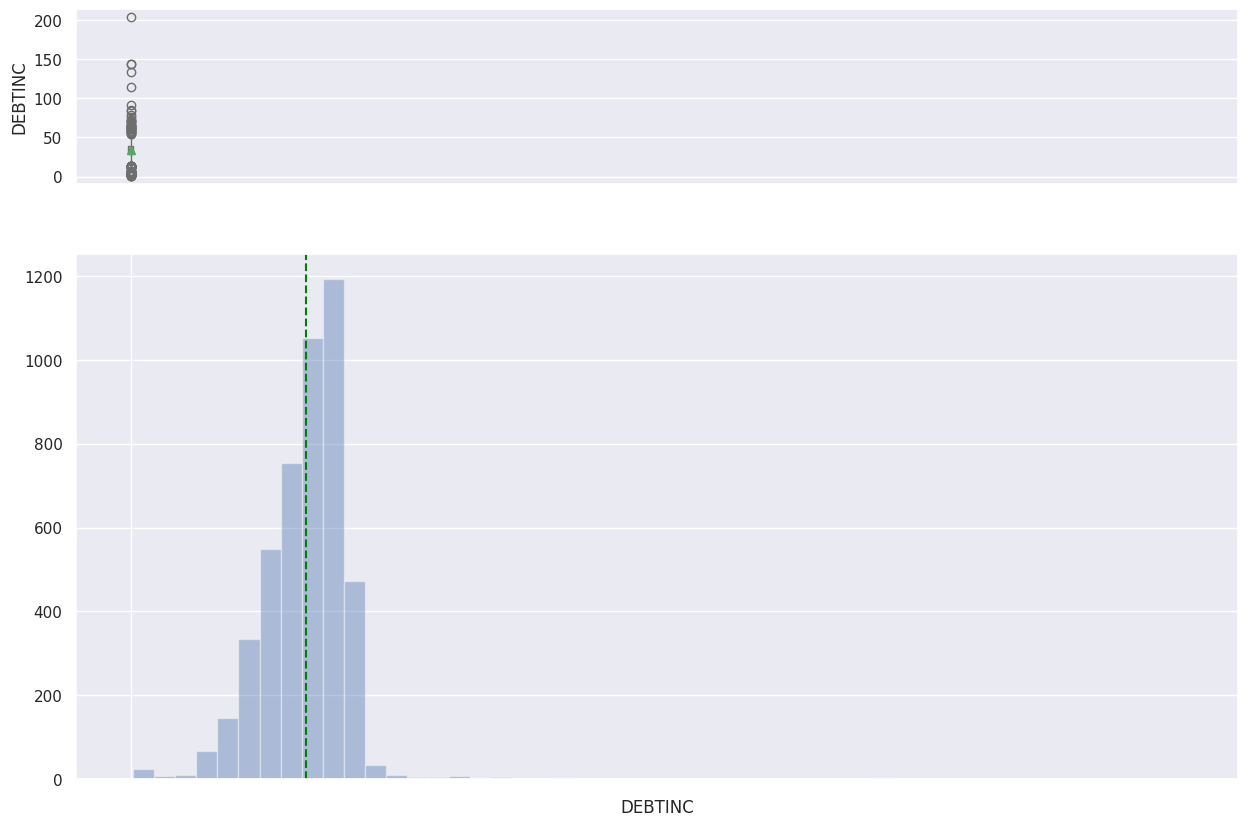

In [24]:
# Building the histogram boxplot for Loan
for i in num_cols_title:
    histogram_boxplot(data[i])



##### **Observations:**
* LOAN, MORTDUE, VALUE, YOJ, DEROG, DELINQ, and NINQ show right skewd distributions with outliers.
* CLAGE, CLNO and DEBTINC are close to normal distribution, with DEBTINC showing outliers on both sides.



---


### **Univariate Analysis**


In [25]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature)  # total number of samples in the feature
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Avoiding division by zero if height is zero
            percentage = '{:.1f}%'.format(100 * height / total)
            x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
            y = p.get_height()  # height of the plot
            ax.annotate(percentage, (x, y), ha='center', va='bottom', size=12)

####Analyze Barplot for DELINQ

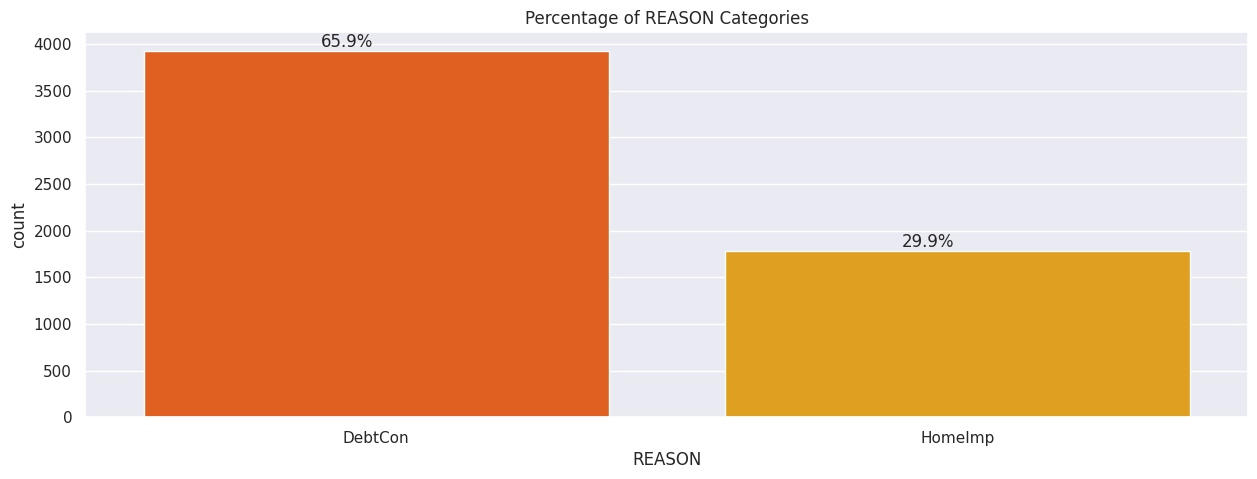

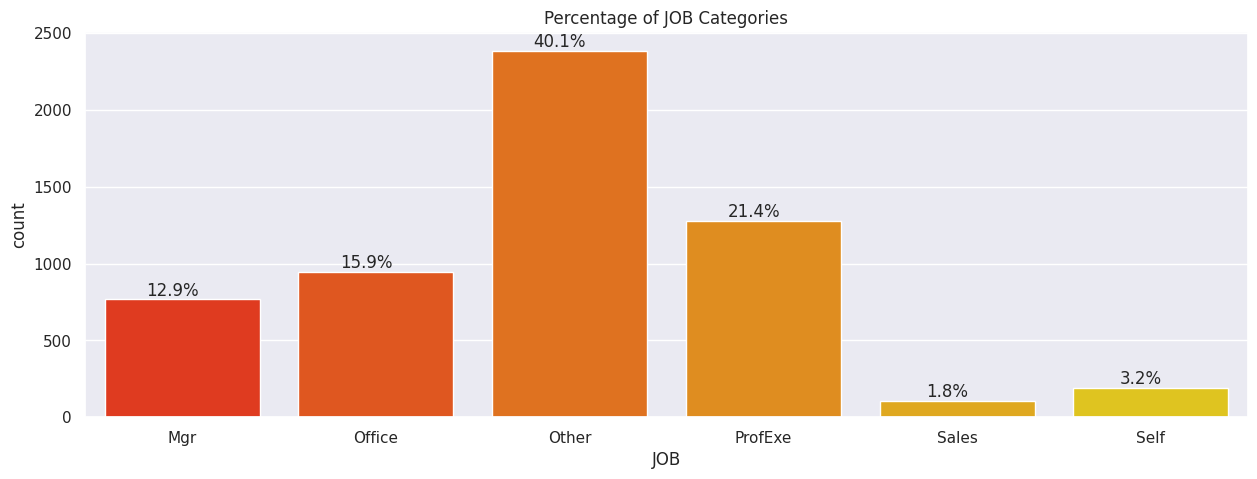

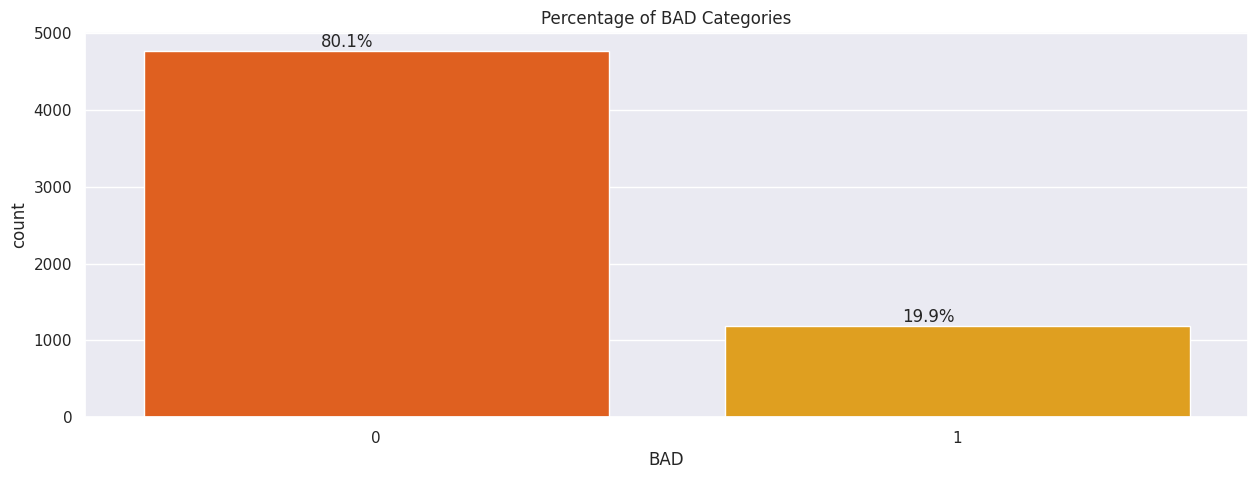

In [26]:
# Loop through the columns to create bar plots and annotate them with percentages

for i in cols:
    plt.figure(figsize=(15, 5))
    ax = sns.countplot(x=data[i], palette='autumn')
    perc_on_bar(ax, data[i])
    plt.title(f'Percentage of {i} Categories')
    plt.show()

##### **Observations**:
* For JOB, others which possible is combination of several jobs, highest count, followed by Porofessional Executives and then Office and Mgr respectively.
* Sales count is lowest, which means either they don't need LOAN or they don't apply for loan or they believe that they may not get loan. We can explore this in details using bivariate graph.
* BAD shows close to 20% loan are defaulted by clients in past.
* Debt consolidation is a mojor REASON loan request with almost 66% applicants.



---



### **Bivariate Analysis**

### **Bivariate Analysis: Continuous and Categorical Variables**

#### Analyze BAD vs LOAN, MORTDUE, VALUES, DEBTINC and YOJ

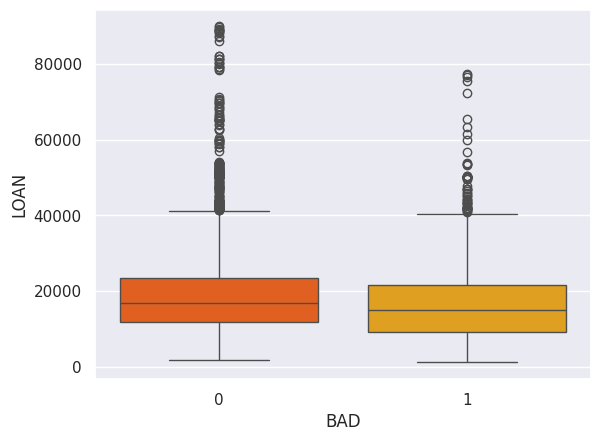

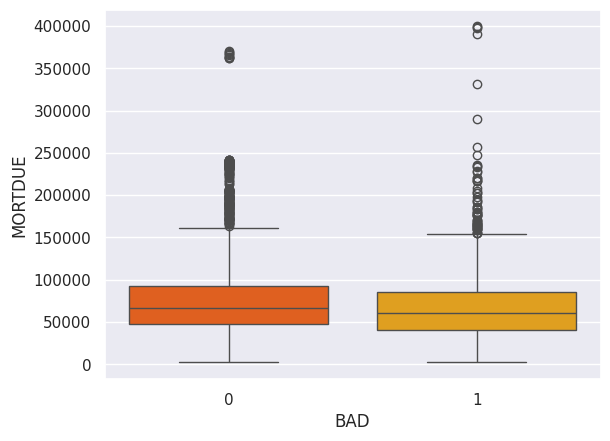

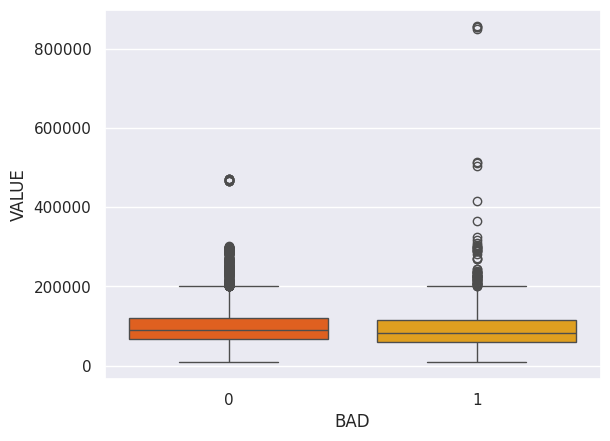

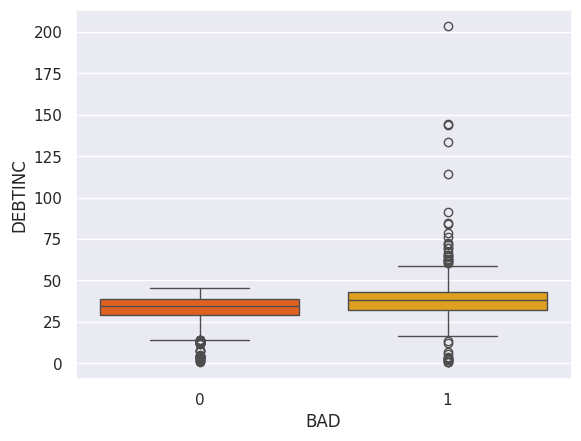

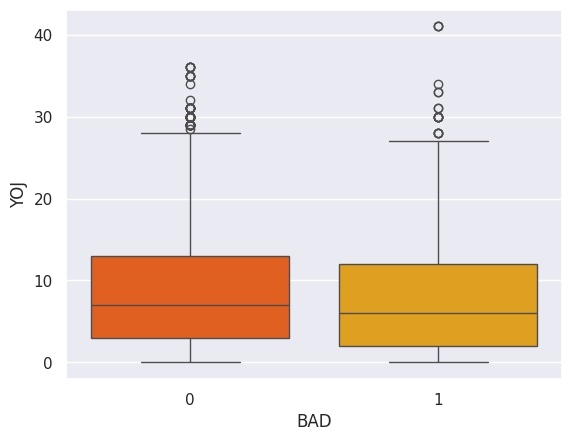

In [27]:
sns.boxplot(x=data["BAD"],y=data['LOAN'],palette="autumn")
plt.show()
sns.boxplot(x=data["BAD"],y=data['MORTDUE'],palette="autumn")
plt.show()
sns.boxplot(x=data["BAD"],y=data['VALUE'],palette="autumn")
plt.show()
sns.boxplot(x=data["BAD"],y=data['DEBTINC'],palette="autumn")
plt.show()
sns.boxplot(x=data["BAD"],y=data['YOJ'],palette="autumn")
plt.show()

##### **Observations**:
* BAD vs LOAN: Defaulting loan doesn't impact the loan approved amount.
* BAD vs MORTDUE: Defaulting loan shows no significant change on the mortgage due amount
* BAD vs VALUE: There seems to be no significant difference in the property's current value between clients who defaulted and those who did not.
* BAD vs DEBTINC: The defaulted clients bar shows outliers on both sides. It shows that larger deb-to-income-ratio is one of the reason for BAD loans.
* BAD vs YOJ: YOJ doesn't seems to be a reason for BAD loans.

---

#### **Bivariate Analysis: Two Continuous Variables**

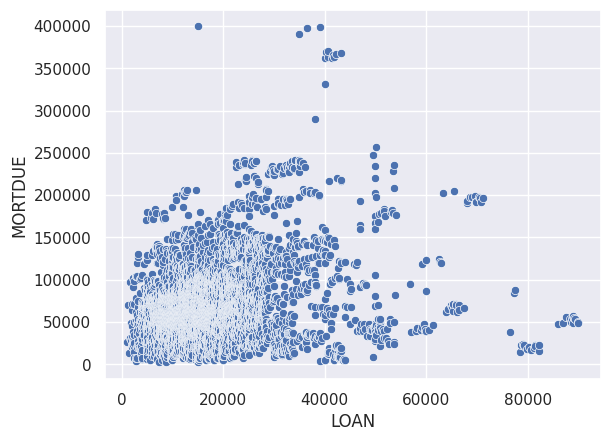

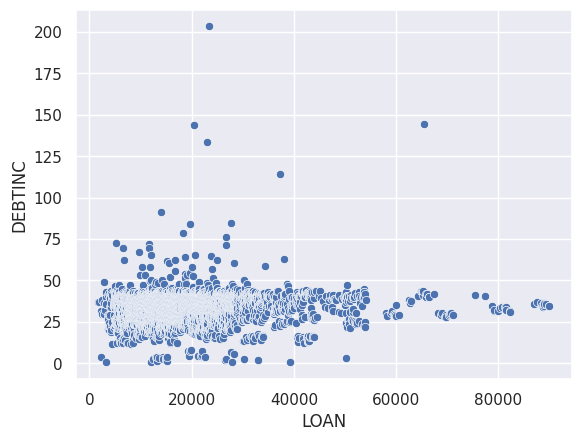

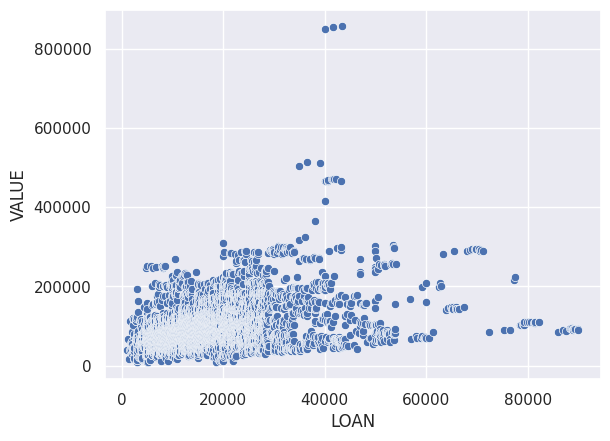

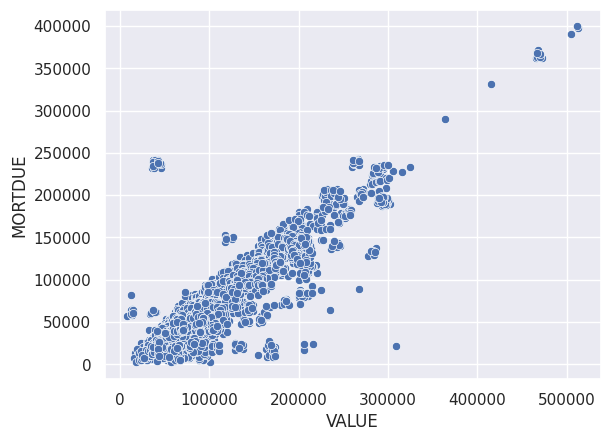

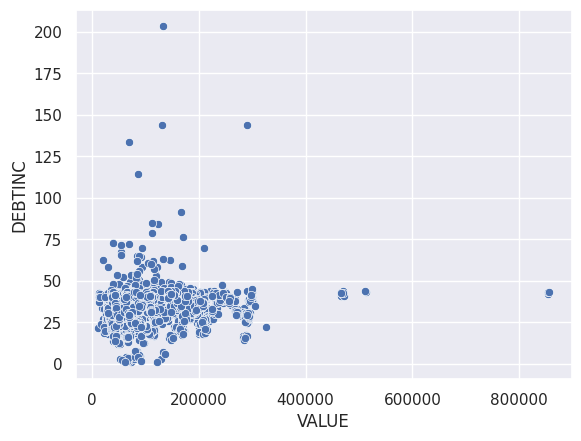

In [28]:
sns.scatterplot(x=data["LOAN"],y=data['MORTDUE'])
plt.show()
sns.scatterplot(x=data["LOAN"],y=data['DEBTINC'])
plt.show()
sns.scatterplot(x=data["LOAN"],y=data['VALUE'])
plt.show()
sns.scatterplot(x=data["VALUE"],y=data['MORTDUE'])
plt.show()
sns.scatterplot(x=data["VALUE"],y=data['DEBTINC'])
plt.show()


##### **Observations**:
* It seems that there is a linear correlation between VALUE and MORTDUE, which makes sense
* No other varaibles shows liners correlation
* For maximum applicants debt-to-income ratio is below 50%

---

### **Bivariate Analysis:  BAD vs Categorical Variables**

###The stacked bar chart (aka stacked bar graph)

In [29]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

###### Plot stacked bar plot for for LOAN and REASON

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


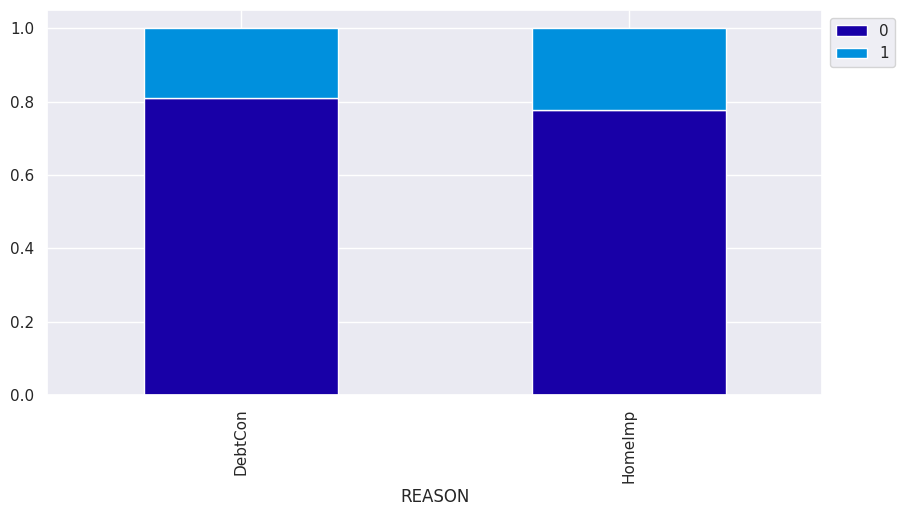

In [30]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['REASON'])

BAD       0     1   All
DEROG                  
0.0    3773   754  4527
1.0     266   169   435
2.0      78    82   160
3.0      15    43    58
4.0       5    18    23
5.0       8     7    15
6.0       5    10    15
7.0       0     8     8
8.0       0     6     6
9.0       0     3     3
10.0      0     2     2
All    4150  1102  5252
------------------------------------------------------------------------------------------------------------------------


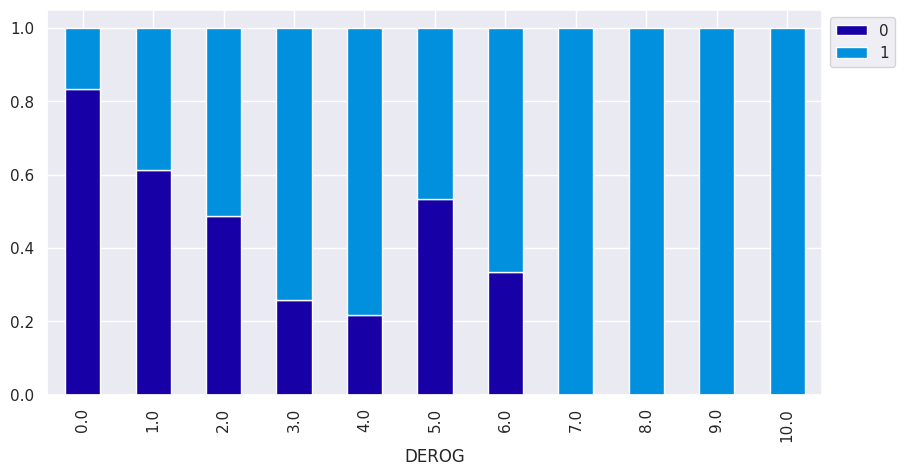

In [31]:
# Plot stacked bar plot for BAD and DEROG
stacked_plot(data['DEROG'])

BAD        0     1   All
DELINQ                  
0.0     3596   583  4179
1.0      432   222   654
2.0      138   112   250
3.0       58    71   129
4.0       32    46    78
5.0        7    31    38
6.0        0    27    27
7.0        0    13    13
8.0        0     5     5
10.0       0     2     2
11.0       0     2     2
12.0       0     1     1
13.0       0     1     1
15.0       0     1     1
All     4263  1117  5380
------------------------------------------------------------------------------------------------------------------------


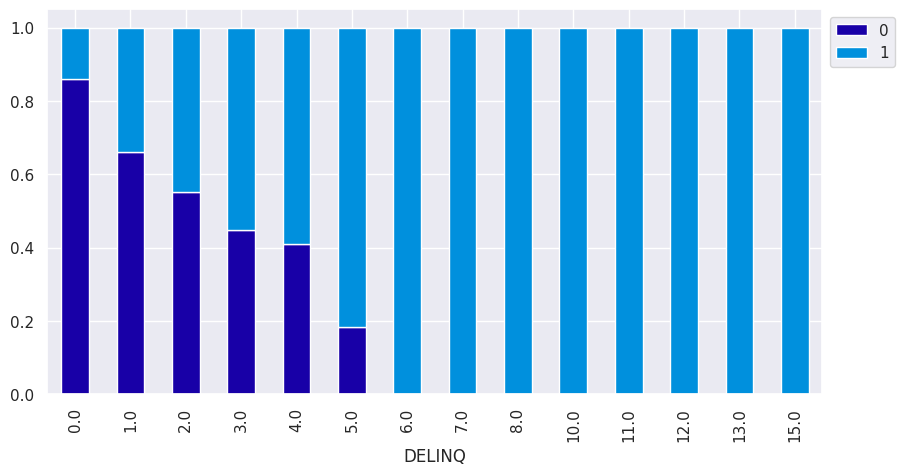

In [32]:
# Plot stacked bar plot for BAD and DELINQ
stacked_plot(data['DELINQ'])

BAD         0     1   All
JOB                      
Mgr       588   179   767
Office    823   125   948
Other    1834   554  2388
ProfExe  1064   212  1276
Sales      71    38   109
Self      135    58   193
All      4515  1166  5681
------------------------------------------------------------------------------------------------------------------------


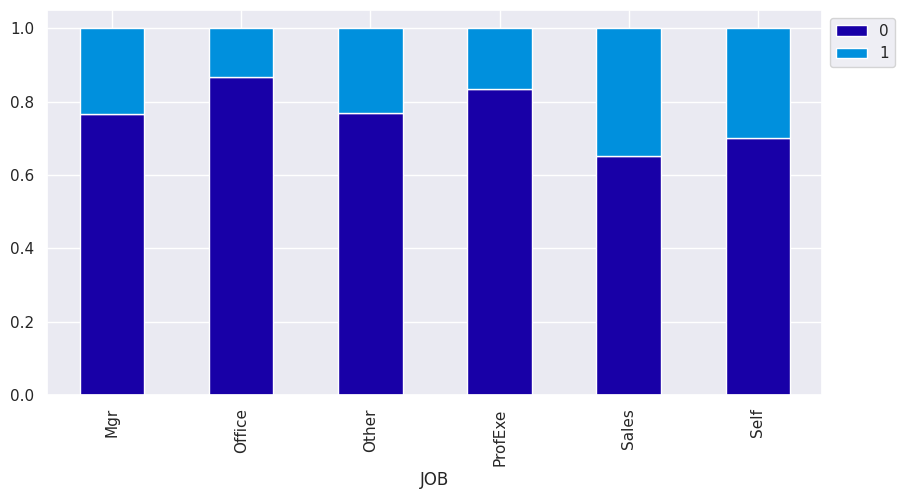

In [33]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['JOB'])

##### **Observations**:
* No matter what the reason for loan is, almost 20% defaults the loans. Not surprised that it is following Pareto principle, but it does significes the data set collected is good to explore.
* Less that 20% loan applicats have no DEROG mark, with 6 being max DEROG value for loan defaulters
* Less that 20% loan applicats have no DELINQ mark, with 5 being max DEROG value for loan defaulters
* SALES shows maximum loan defaulters

---

### **Multivariate Analysis**

#### Analyze Correlation Heatmap for Numerical Variables

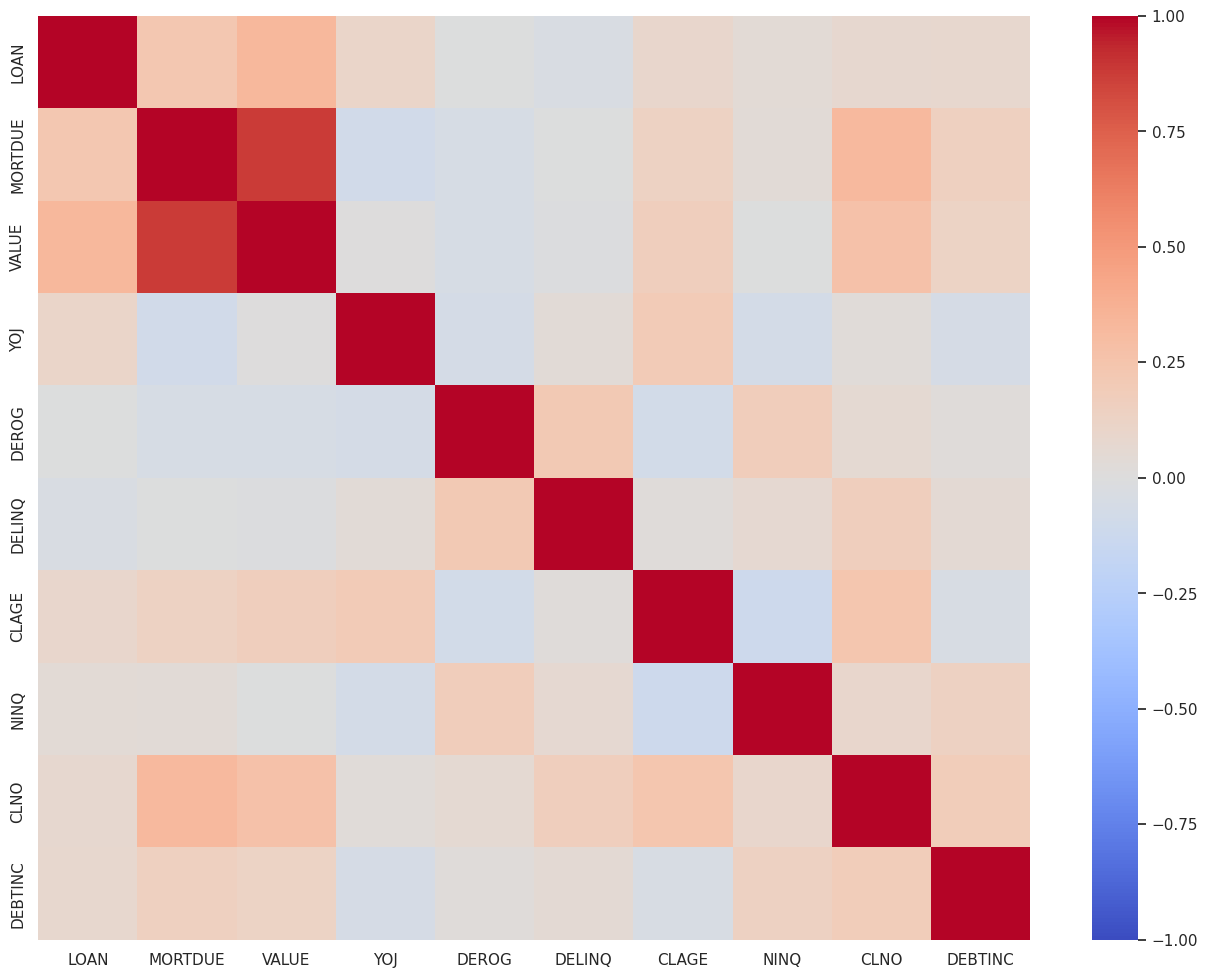

In [34]:
# Separating numerical variables
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

# Building correlation matrix for numerical columns
corr = data[numerical_col].corr()

# ploting the heatmap

plt.figure(figsize=(16,12))
sns.heatmap(corr,cmap='coolwarm',vmax=1,vmin=-1,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns);

#### Building pairplot for the data with hue = 'BAD'

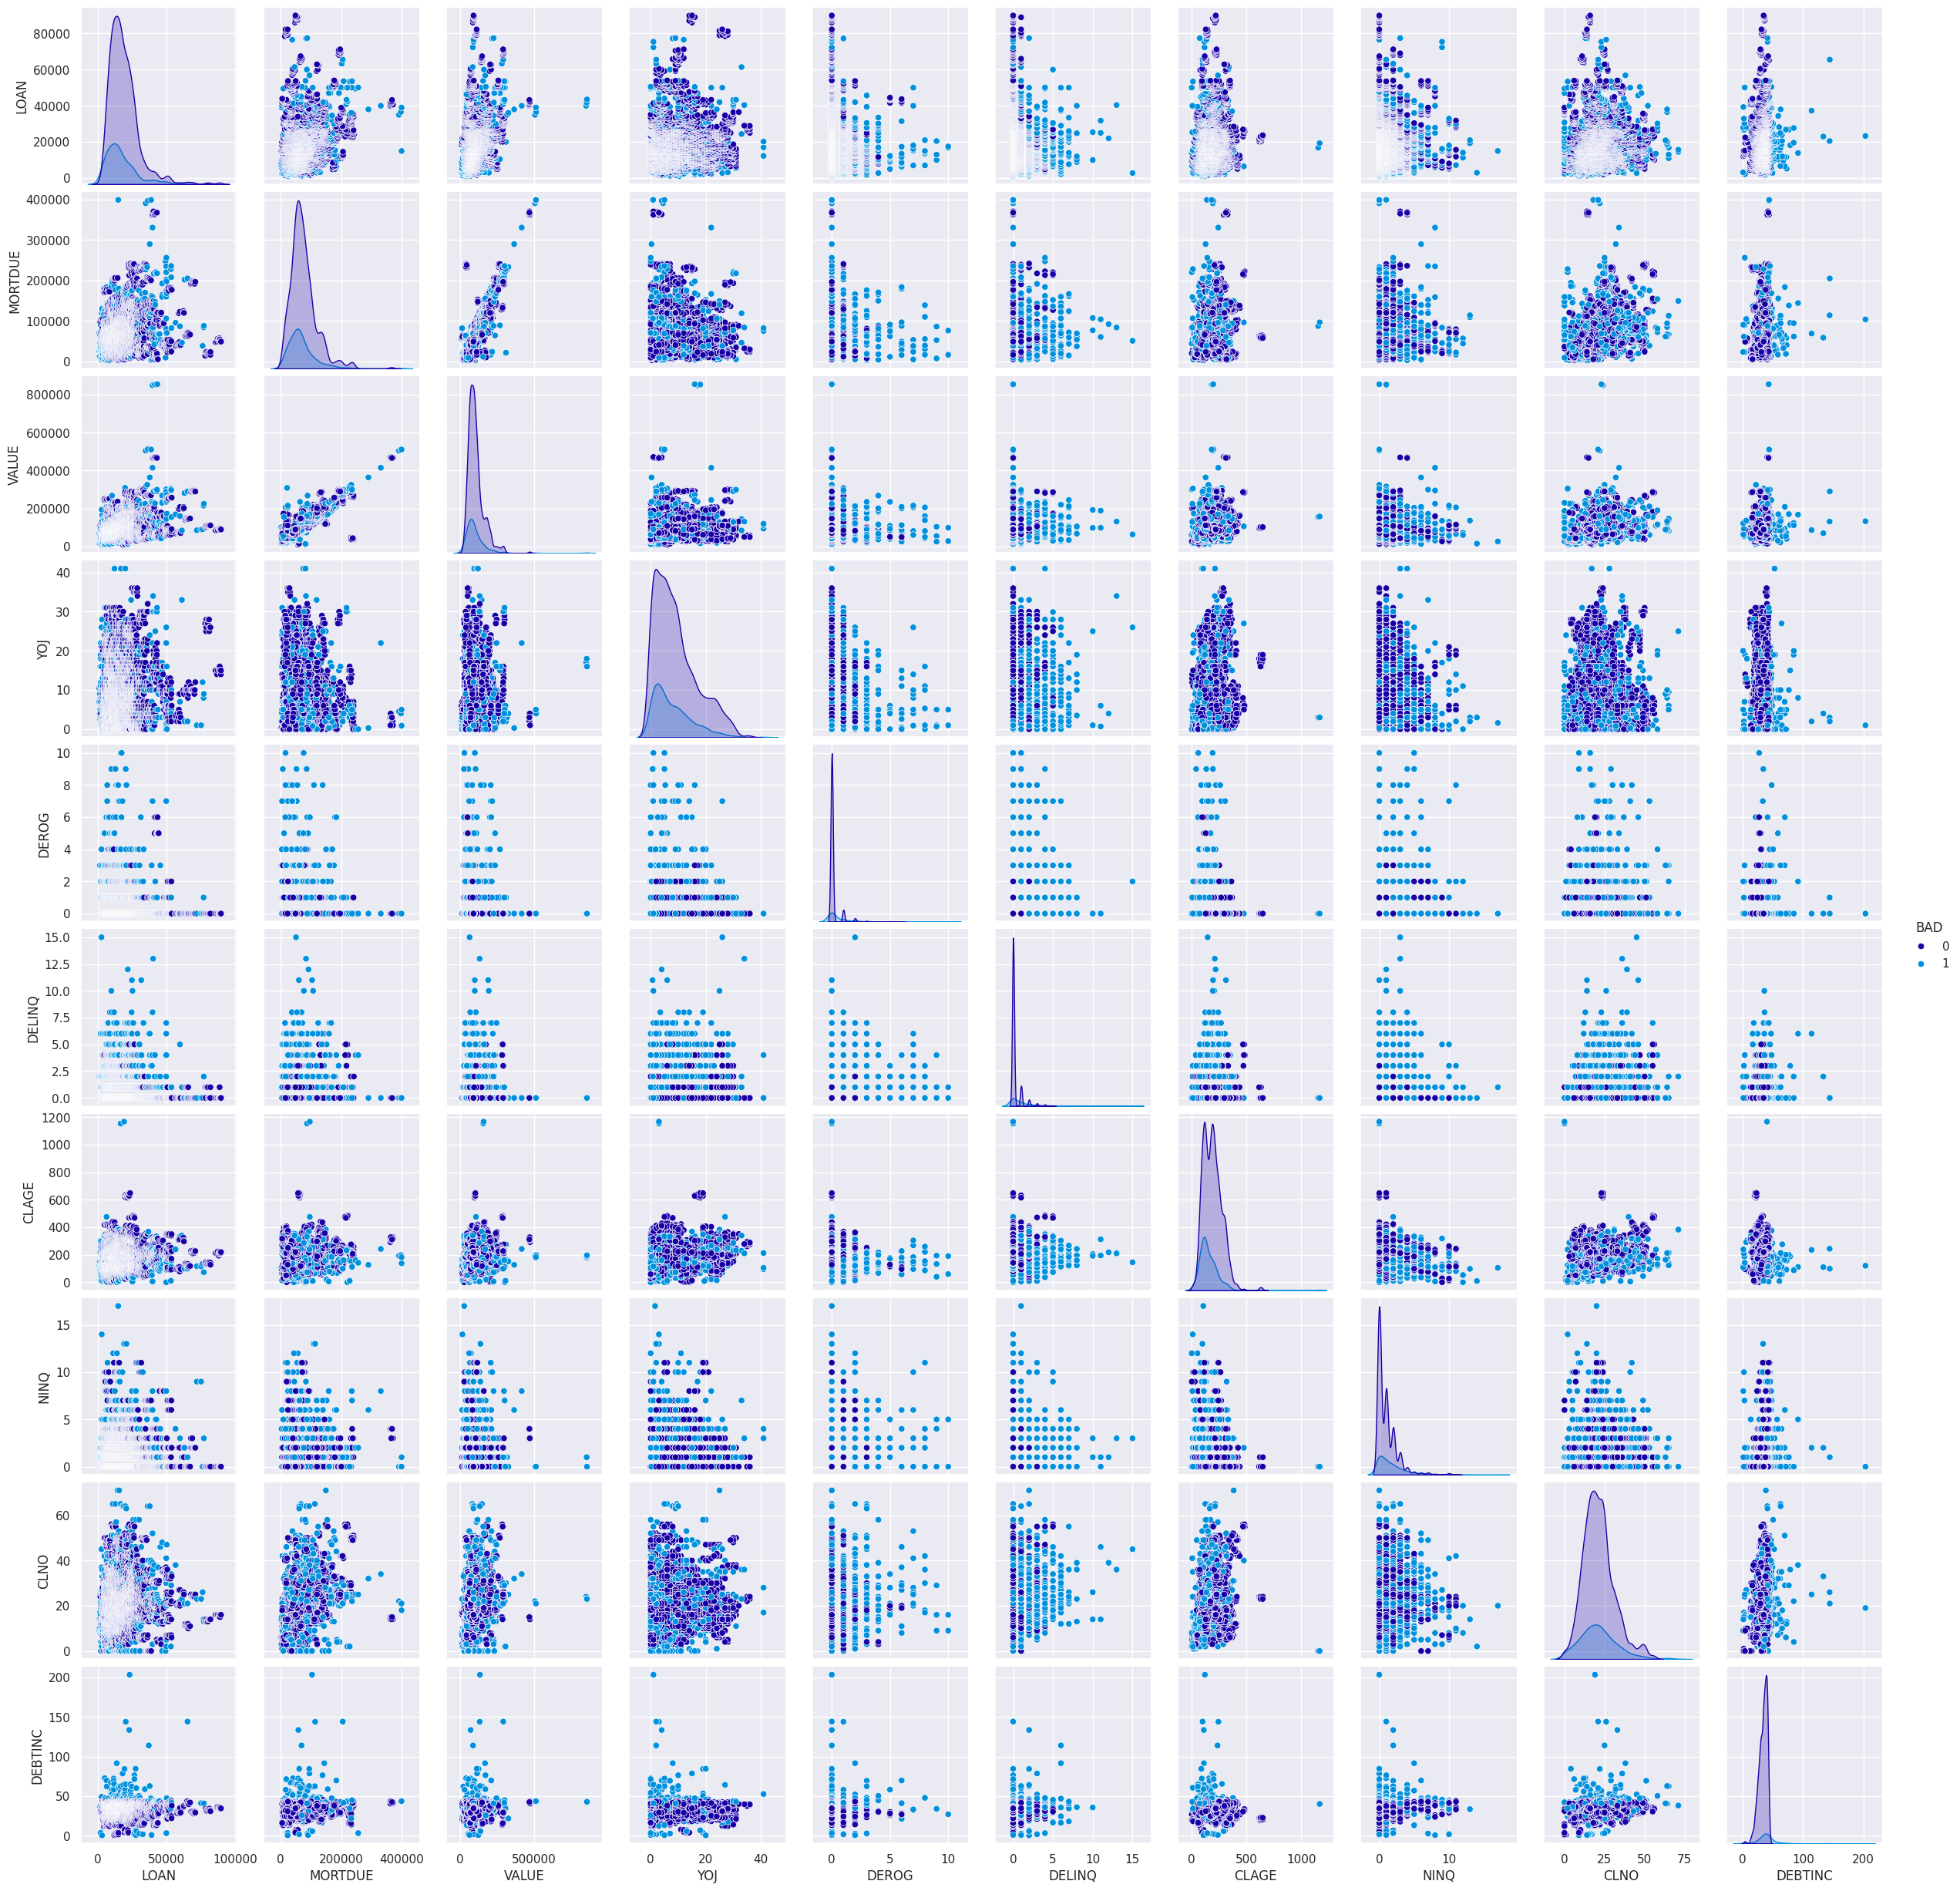

In [35]:
sns.pairplot(data, hue="BAD")

## Treating Outliers

In [36]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''

    # Calculating the Interquartile Range (IQR) for the column
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75) # 75th quantile
    IQR=Q3-Q1 # IQR Range

    # Defining the lower and upper bounds for outliers
    Lower_Whisker = Q1-1.5*IQR
    Upper_Whisker = Q3+1.5*IQR

    # Clipping the column values to the boundaries
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for col in col_list:
        df = treat_outliers(df,col)

    return df

In [37]:
df_raw = data.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

df = treat_outliers_all(df_raw,numerical_col)

df

BAD   LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0      1   1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1      1   1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     0.0   
2      1   1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3      1   1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4      0   1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   
...   ..    ...      ...       ...      ...     ...   ...    ...     ...   
5955   0  41600  57264.0   90185.0  DebtCon   Other  16.0    0.0     0.0   
5956   0  41600  54576.0   92937.0  DebtCon   Other  16.0    0.0     0.0   
5957   0  41600  54045.0   92924.0  DebtCon   Other  15.0    0.0     0.0   
5958   0  41600  50370.0   91861.0  DebtCon   Other  14.0    0.0     0.0   
5959   0  41600  48811.0   88934.0  DebtCon   Other  15.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC  
0      94.366667   1.0   9.0        NaN  
1     121.833333   0.0  14.0        NaN  
2     149.466667   1.0  10.0        NaN  
3            NaN   NaN   NaN        NaN  
4      93.333333   0.0  14.0        NaN  
...          ...   ...   ...        ...  
5955  221.808718   0.0  16.0  36.112347  
5956  208.692070   0.0  15.0  35.859971  
5957  212.279697   0.0  15.0  35.556590  
5958  213.892709   0.0  16.0  34.340882  
5959  219.601002   0.0  16.0  34.571519  

[5960 rows x 13 columns]

## Treating Missing Values

#### Adding new columns in the dataset for each column which has missing values

In [38]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0.
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

In [39]:
# list of columns that has missing values in it
missing_col = [col for col in df.columns if df[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(df,colmn)


#### Filling missing values in numerical columns with median and mode in categorical variables

In [40]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = df.select_dtypes('number')

# Select string and object columns.
cat_data = df.select_dtypes(include=['category', 'object']).columns.tolist()

# Fill numeric columns with median.
df[num_data.columns] = num_data.fillna(num_data.median())

# Fill object columns with model.
for column in cat_data:
    df[column] = df[column].fillna(df[column].mode()[0])

In [41]:
df.isnull().sum()

BAD                            0
LOAN                           0
MORTDUE                        0
VALUE                          0
REASON                         0
JOB                            0
YOJ                            0
DEROG                          0
DELINQ                         0
CLAGE                          0
NINQ                           0
CLNO                           0
DEBTINC                        0
MORTDUE_missing_values_flag    0
VALUE_missing_values_flag      0
REASON_missing_values_flag     0
JOB_missing_values_flag        0
YOJ_missing_values_flag        0
DEROG_missing_values_flag      0
DELINQ_missing_values_flag     0
CLAGE_missing_values_flag      0
NINQ_missing_values_flag       0
CLNO_missing_values_flag       0
DEBTINC_missing_values_flag    0
dtype: int64

In [42]:
# Droping null flag columns
null_flag_columns = [
    'MORTDUE_missing_values_flag',
    'VALUE_missing_values_flag',
    'REASON_missing_values_flag',
    'JOB_missing_values_flag',
    'YOJ_missing_values_flag',
    'DEROG_missing_values_flag',
    'DELINQ_missing_values_flag',
    'CLAGE_missing_values_flag',
    'NINQ_missing_values_flag',
    'CLNO_missing_values_flag',
    'DEBTINC_missing_values_flag'
]

# Droping the specified columns from the DataFrame
df_clean = df.drop(columns=null_flag_columns)

# Displaying information about the cleaned DataFrame
df_clean.info()
print('*' * 50)

# Displaying the first five rows of the cleaned DataFrame
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5960 non-null   float64 
 3   VALUE    5960 non-null   float64 
 4   REASON   5960 non-null   category
 5   JOB      5960 non-null   category
 6   YOJ      5960 non-null   float64 
 7   DEROG    5960 non-null   float64 
 8   DELINQ   5960 non-null   float64 
 9   CLAGE    5960 non-null   float64 
 10  NINQ     5960 non-null   float64 
 11  CLNO     5960 non-null   float64 
 12  DEBTINC  5960 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB
**************************************************


BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0   1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1   1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     0.0   
2   1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3   1  1500  65019.0   89235.5  DebtCon   Other   7.0    0.0     0.0   
4   0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO    DEBTINC  
0   94.366667   1.0   9.0  34.818262  
1  121.833333   0.0  14.0  34.818262  
2  149.466667   1.0  10.0  34.818262  
3  173.466667   1.0  20.0  34.818262  
4   93.333333   0.0  14.0  34.818262

## **Model Building - Approach**
- Data preparation
- Partition the data into train and test set
- Build the model
- Fit on the train data
- Tune the model
- Test the model on test set

## **Data Preparation**

### **Separating the target variable from other variables**

In [43]:
#@title
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix
X = df_clean.drop(columns=['BAD'])

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
X = pd.get_dummies(X, drop_first=True)

# Create y(dependent varibale)
y = df_clean['BAD']

#### Data Scalling


###### In this case features have different scales, so we will use the Standard Scaler method, which centers and scales the dataset using the Z-Score.

In [44]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_scaled = sc.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

### **Splitting the data into 70% train and 30% test set**

In [45]:
# Spliting the data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

### **Think about it**
- You can try different splits like 70:30 or 80:20 as per your choice. Does this change in split affect the performance?
- If the data is imbalanced, can you make the split more balanced and if yes, how?

## **Model Evaluation Criterion**

#### After understanding the problem statement, think about which evaluation metrics to consider and why.

In [46]:
#creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Build a Logistic Regression Model**

### Logistic Regression

In [47]:
# Defining the Logistic regression model
lg_model = LogisticRegression()


# Fitting the model on the training data
lg_model.fit(X_train, y_train)

LogisticRegression()

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      3329
           1       0.33      0.00      0.01       843

    accuracy                           0.80      4172
   macro avg       0.57      0.50      0.45      4172
weighted avg       0.70      0.80      0.71      4172



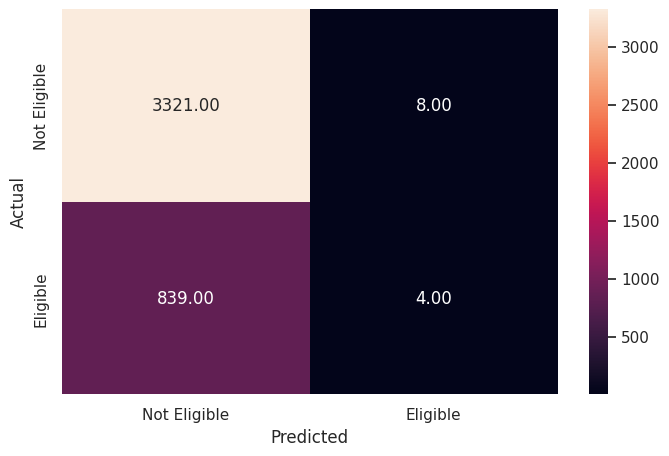

In [48]:
#Predict for train set
y_pred_train_set = lg_model.predict(X_train)

#checking the performance on the train dataset
metrics_score(y_train, y_pred_train_set)


#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1442
           1       0.64      0.02      0.04       346

    accuracy                           0.81      1788
   macro avg       0.72      0.51      0.47      1788
weighted avg       0.78      0.81      0.73      1788



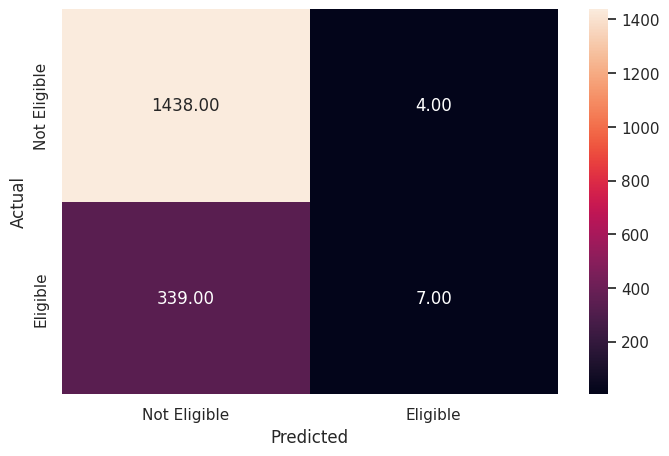

In [49]:
#Predict for test set
y_pred_test_set = lg_model.predict(X_test)

#checking the performance on the test dataset
metrics_score(y_test, y_pred_test_set)

##### **Observations**:
* Accuracy for the train and test datasets is at 80% and 81% respectively, almost same.
* Recall is low for both train and test datasets. Thus model will not perform as expected.

---

#### Let's check the coefficients, and check which variables are important and how they affect the process of loan approval

In [50]:
# Printing the coefficients of logistic regression
cols = X_scaled.columns
coef_lg_model = lg_model.coef_

pd.DataFrame(coef_lg_model,columns = cols).T.sort_values(by = 0, ascending = False)

0
NINQ            2.264814e-02
DEBTINC         1.361367e-02
CLNO            9.971576e-03
JOB_Self        1.688010e-03
JOB_Sales       9.206844e-04
REASON_HomeImp  7.482880e-04
VALUE           6.871056e-07
DEROG           0.000000e+00
DELINQ          0.000000e+00
MORTDUE        -4.388618e-06
LOAN           -2.439552e-05
JOB_ProfExe    -1.007975e-03
JOB_Other      -1.389830e-03
JOB_Office     -3.656107e-03
CLAGE          -7.082651e-03
YOJ            -2.271155e-02

##### **Observations**:
* CLAGE and MORTDUE affects defaulting rate maximum negatively
* Results are in logs. We can convert them, but don't see any values in doing so, as it seems Logistic Regression is not enough. Let's try `Decission Tree model`.
---

### Decision Tree

In [51]:
#Recreating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [52]:
d_tree_model = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.2, 1: 0.8})
d_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3329
           1       1.00      1.00      1.00       843

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



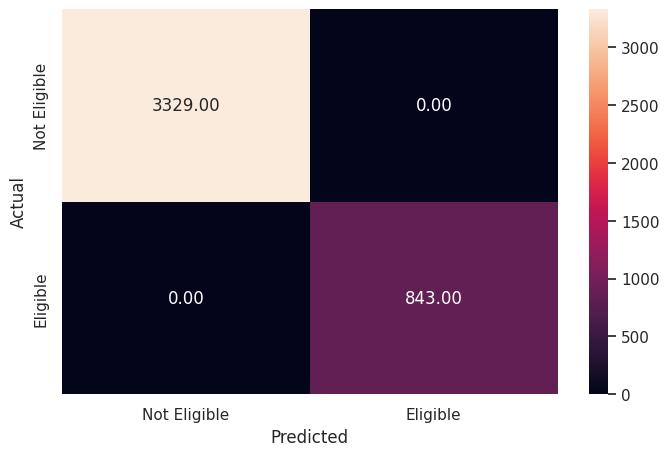

In [53]:
# Checking performance on the training data
y_pred_train1 = d_tree_model.predict(X_train)

metrics_score(y_train,y_pred_train1)

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1442
           1       0.61      0.53      0.57       346

    accuracy                           0.84      1788
   macro avg       0.75      0.73      0.74      1788
weighted avg       0.84      0.84      0.84      1788



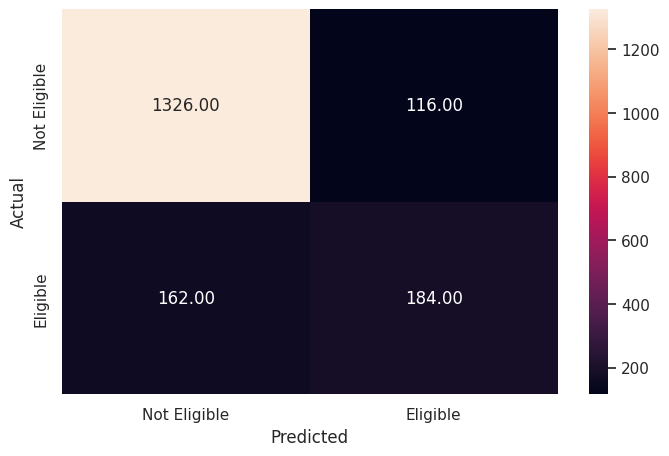

In [54]:
# Checking performance on the testing data
y_pred_test1 = d_tree_model.predict(X_test)

metrics_score(y_test,y_pred_test1)

##### **Observations**:
* Model seems to be overfitting on training data as recall ratio is higher compared to test data
* Model test data has higher precesion that RECALL, we need opposite of it.
* Test data precesion suggests that there is chance that the clinet is going to default, thought it won't.


---

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.**
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth**

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


In [55]:
# Choose the type of classifier
d_tree_model_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_model_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_model_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_model_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=5,
                       min_samples_leaf=5, random_state=7)

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      3329
           1       0.66      0.77      0.71       843

    accuracy                           0.87      4172
   macro avg       0.80      0.83      0.81      4172
weighted avg       0.88      0.87      0.88      4172



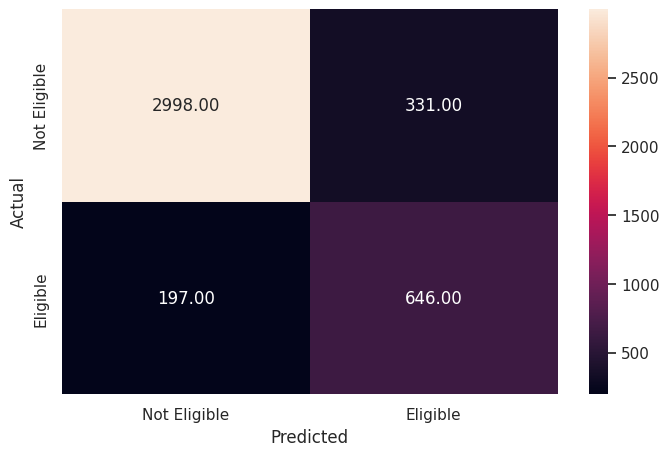

In [56]:
# Checking performance on the training data
pred_train_model2 = d_tree_model_tuned.predict(X_train)

metrics_score(y_train, pred_train_model2)

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1442
           1       0.61      0.53      0.57       346

    accuracy                           0.84      1788
   macro avg       0.75      0.73      0.74      1788
weighted avg       0.84      0.84      0.84      1788



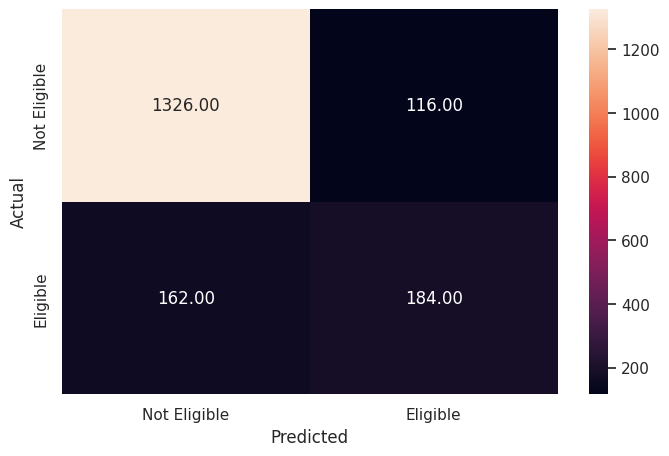

In [57]:
# Checking performance on the testing data
y_pred_test2 = d_tree_model.predict(X_test)
metrics_score(y_test, y_pred_test2)

##### **Observations**:
* As we are trying to reduce the overfitting, the RECALL on training data has been decresed overwhellingly
* Model is not overfitting.
* RECALL in test data for loan paid (BAD =0) applicant is increased.
* Precesion has been reduced.

---


####**Visualizing the Decision Tree**

######Let's visualize the tuned decision tree and observe the decision rules:


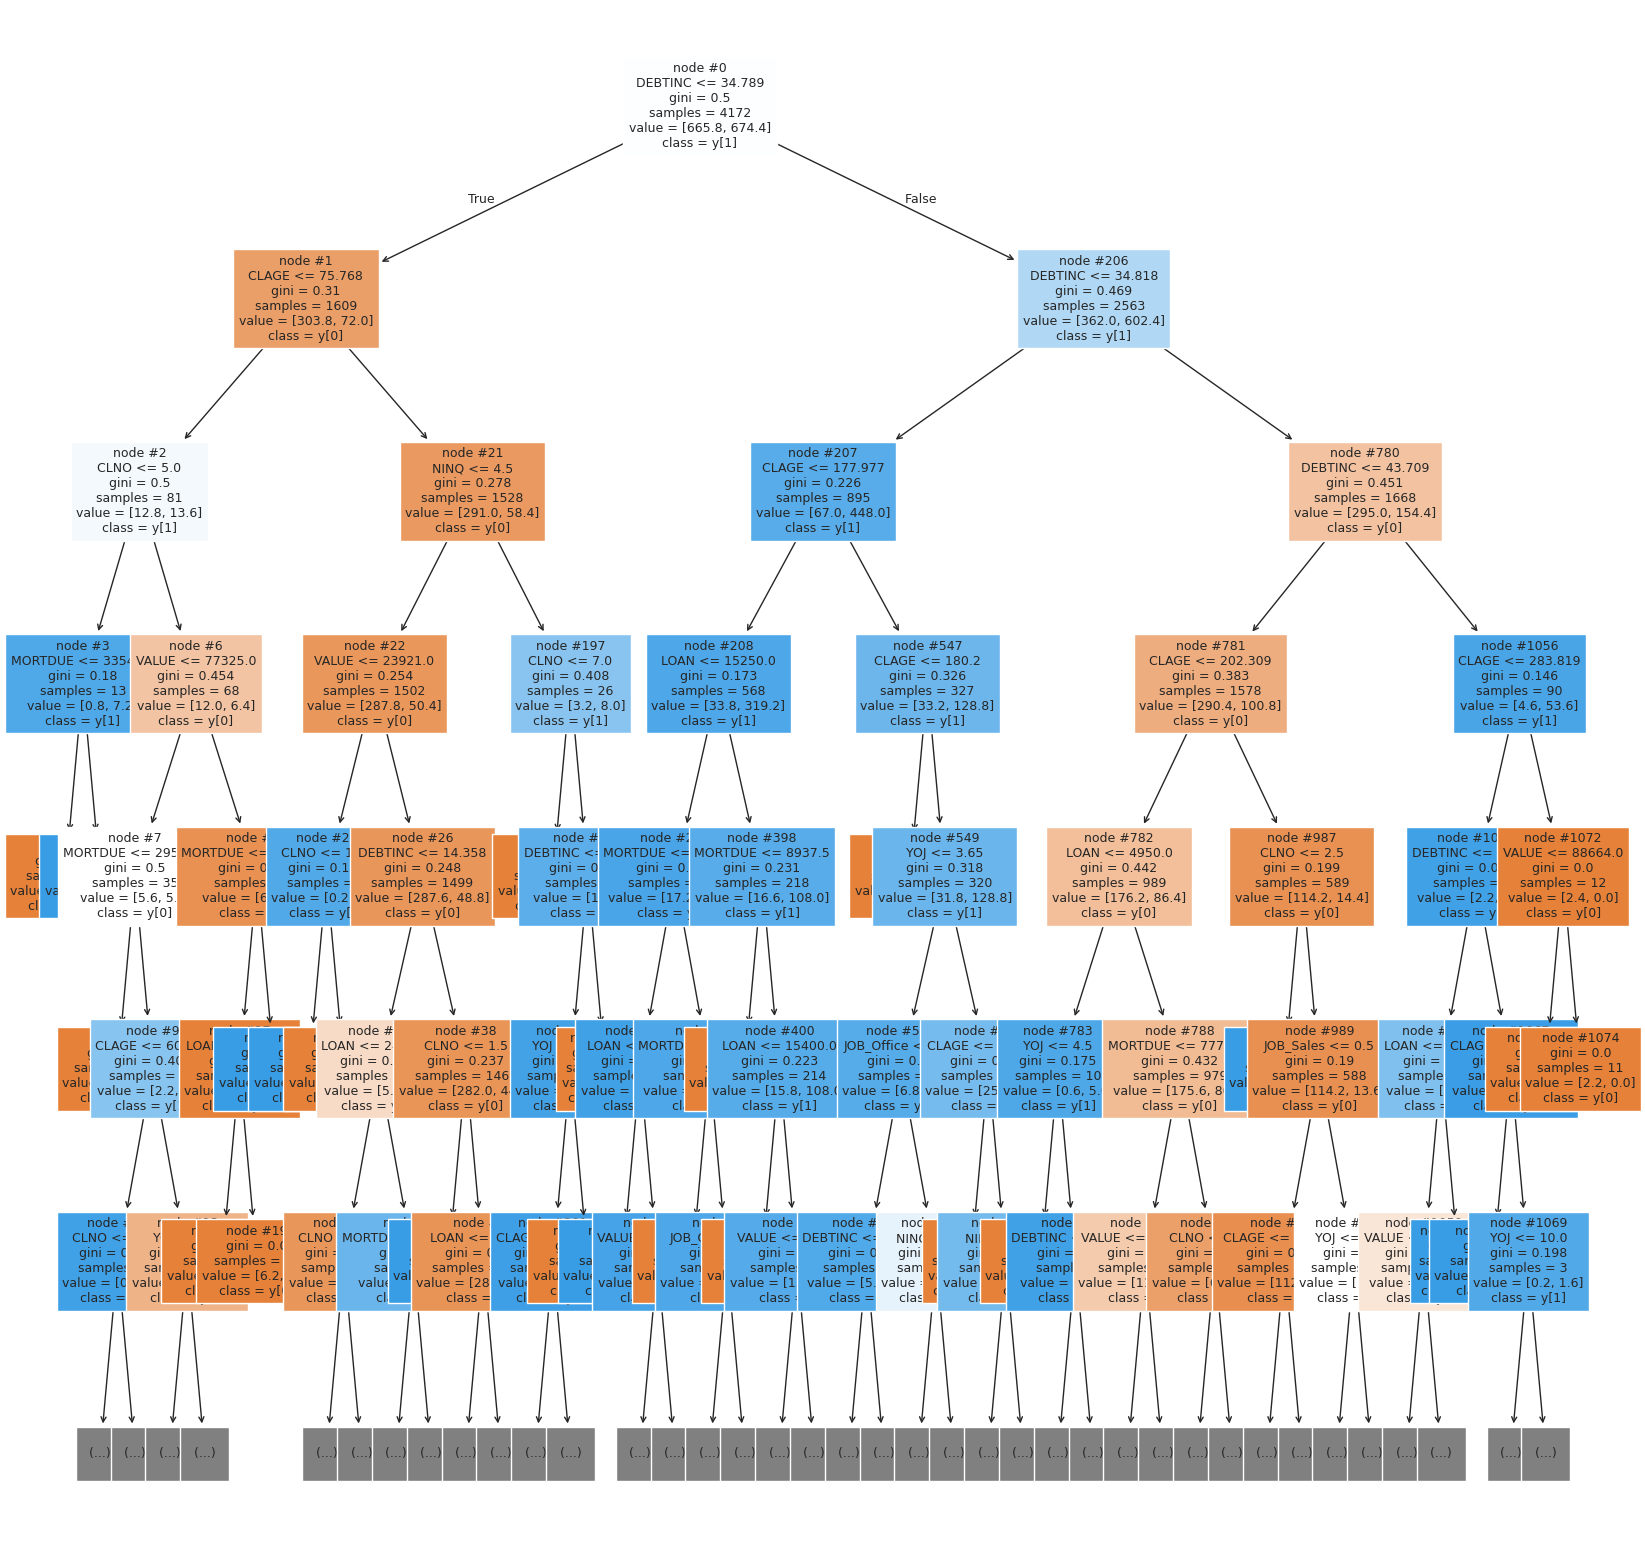

In [58]:
features = list(X.columns)

plt.figure(figsize = (20, 20))
tree.plot_tree(d_tree_model, feature_names = features, max_depth=6, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()


##### **Observations**:
* It shows that higher debt-to-income ratio applicant can more chances of defaulting, which matches with previous finding in EDA.
* For next split, a higher NINQ is more likely to default loan.
* Then it shows that lower CLAGE has is likely to default loan.

---

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction.

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [59]:
# Fitting the random forest tree classifier on the training data
rf_estimator =  RandomForestClassifier(random_state = 7, criterion = "entropy")
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3329
           1       1.00      1.00      1.00       843

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



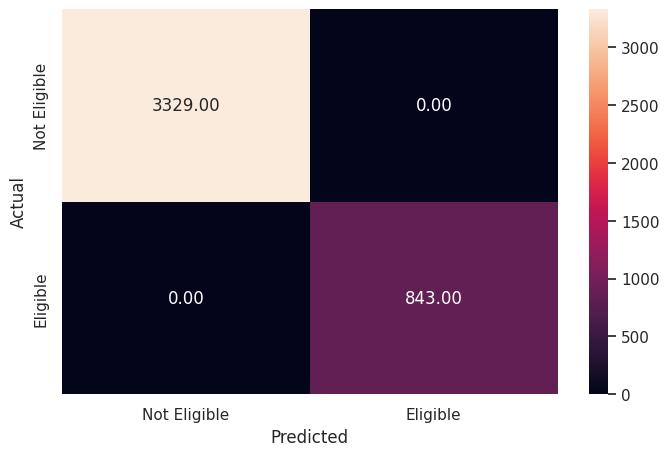

In [60]:
# Checking performance on the training data
pred_train_model3 = rf_estimator.predict(X_train)

metrics_score(y_train, pred_train_model3)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1442
           1       0.80      0.63      0.71       346

    accuracy                           0.90      1788
   macro avg       0.86      0.80      0.82      1788
weighted avg       0.89      0.90      0.89      1788



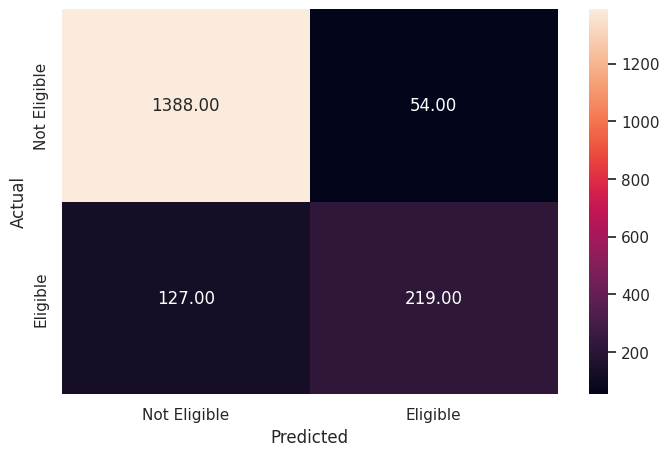

In [61]:
# Checking performance on the testing data
y_pred_test_model3 = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_model3)



##### **Observations**:
* Model seems to be overfitting on training data as recall ratio is higher compared to test data
* Model test data has higher precesion that RECALL, we need opposite of it.

---

### **Random Forest Classifier Hyperparameter Tuning**

In [62]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_

In [63]:
#Fit the best estimator to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=110, random_state=7)

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      3329
           1       0.64      0.77      0.70       843

    accuracy                           0.87      4172
   macro avg       0.79      0.83      0.81      4172
weighted avg       0.88      0.87      0.87      4172



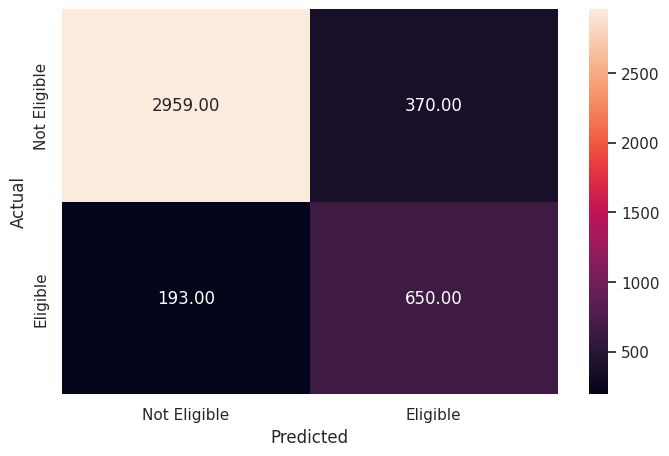

In [64]:
# Checking performance on the training data
pred_train_model4 = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, pred_train_model4)

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      1442
           1       0.61      0.75      0.68       346

    accuracy                           0.86      1788
   macro avg       0.77      0.82      0.79      1788
weighted avg       0.87      0.86      0.86      1788



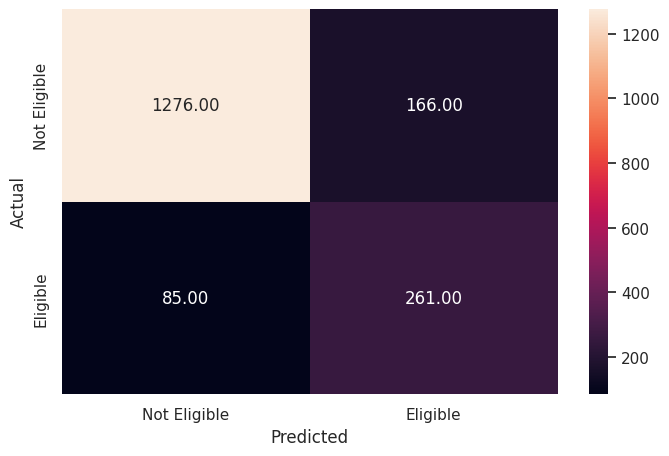

In [65]:
y_pred_test_model5 = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_model5)

##### **Observations**:
* Model still seems to be overfitting on training data as recall ratio is higher compared to test data     
* For non-defaulters (BAD =0), the model test data has higher precesion than RECALL, we need opposite of it.

---

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):**
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

In [66]:
def evaluate_model_metrics(model, display=True, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    """
    Evaluates the accuracy, precision, and recall of a given model for both training and test sets.

    Parameters:
    - model: Classifier used for predictions.
    - display (bool): If True, prints the metric scores for both training and test datasets. Default is True.
    - X_train: Training dataset features.
    - X_test: Test dataset features.
    - y_train: Training dataset labels.
    - y_test: Test dataset labels.

    Returns:
    - metrics_scores (dict): A dictionary containing accuracy, precision, and recall scores for training and test datasets.
    """
    # Making thr predictions for both training and test sets
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    # Calculating the metrics scores
    metrics_scores = {
        'train_accuracy': accuracy_score(y_train, pred_train),
        'test_accuracy': accuracy_score(y_test, pred_test),
        'train_precision': precision_score(y_train, pred_train),
        'test_precision': precision_score(y_test, pred_test),
        'train_recall': recall_score(y_train, pred_train),
        'test_recall': recall_score(y_test, pred_test),
    }

    # Displaying the metric scores when the display flag is set to True
    if display:
        print(f"Accuracy - Training: {metrics_scores['train_accuracy']:.2f}, Test: {metrics_scores['test_accuracy']:.2f}")
        print(f"Precision - Training: {metrics_scores['train_precision']:.2f}, Test: {metrics_scores['test_precision']:.2f}")
        print(f"Recall - Training: {metrics_scores['train_recall']:.2f}, Test: {metrics_scores['test_recall']:.2f}")

    return metrics_scores

# List of models for evaluation
models = [rf_estimator_tuned, rf_estimator, d_tree_model_tuned, d_tree_model]
model_names = ['Tuned Random Forest', 'Random Forest', 'Tuned Decision Tree', 'Decision Tree']

# Initializing lists to store results
train_accuracy, test_accuracy = [], []
train_precision, test_precision = [], []
train_recall, test_recall = [], []

# Looping through each model to calculate metrics and to store the results
for model in models:
    scores = evaluate_model_metrics(model, display=False)
    train_accuracy.append(scores['train_accuracy'])
    test_accuracy.append(scores['test_accuracy'])
    train_precision.append(scores['train_precision'])
    test_precision.append(scores['test_precision'])
    train_recall.append(scores['train_recall'])
    test_recall.append(scores['test_recall'])

# Creating the DataFrame to compare model performance
comparison_frame = pd.DataFrame({
    'Model': model_names,
    'Train_Accuracy': train_accuracy,
    'Test_Accuracy': test_accuracy,
    'Train_Precision': train_precision,
    'Test_Precision': test_precision,
    'Train_Recall': train_recall,
    'Test_Recall': test_recall
})

# Displaying the DataFrame
comparison_frame

Model  Train_Accuracy  Test_Accuracy  Train_Precision  \
0  Tuned Random Forest        0.865053       0.859620         0.637255   
1        Random Forest        1.000000       0.898770         1.000000   
2  Tuned Decision Tree        0.873442       0.852349         0.661208   
3        Decision Tree        1.000000       0.844519         1.000000   

   Test_Precision  Train_Recall  Test_Recall  
0        0.611241      0.771056     0.754335  
1        0.802198      1.000000     0.632948  
2        0.600985      0.766311     0.705202  
3        0.613333      1.000000     0.531792

##### **Observations**:
* RECALL for both tuned model is almost same
* RECALL ratio for both non-tuned model is 1, and is overfitting
* Train precision in all models is higher than in test models
* Tuned Random Forest model is not overfitting and has better recall, thus recommended, when compared with other models.

---

### **CONCLUSION:**

- Tuned Random Forest model is not overfitting and has better recall, thus recommended, when compared with other models.


---


- Fetures to consider:
  - Applicants with lower LOAN, VALUE and CLAGE are more likely to default the loan.
  - Applicants with higher NINQ, is more likely to default the loan.
  - SALES JOB applicants are more likely to default loan.
- Applicant with more debt-to-income ratio is more likely to default loan.


---

